# Optimization

*What is Optimization?*

Mathematical optimization, often known as mathematical programming, is the process of selecting the optimal element from a group of possibilities based on some criterion. In its most basic form, an optimization problem is methodically selecting input values from within an acceptable set and computing the function's value to maximize or minimize a real function. Optimisation problems arise in a wide variety of business cases, and there are a wide variety of algorithms and approaches.

Stochastic optimisation refers to a collection of methods for minimizing or maximizing an objective function when randomness is present. Examples of stochastic optimization algorithms include stochastic gradient-descent (SGD) and simulated annealing.

## Stochastic Optimization

Optimization is used almost everywhere. Here we will try to understand it with the help of Inverse Modeling.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from tqdm import tqdm
from utils.plot import *
from utils.objectivefunction import bimodal
# Turn off matplotlib plot in Notebook
plt.ioff()
# Pass the ffmpeg path
  
plt.rcParams['animation.ffmpeg_path'] = '/hpc/apps/pyhpc/dist/conda/x86_64/envs/intel-2020/bin/ffmpeg'

### Inverse Modeling

The study of properties and processes within media that are not accessible to direct observation is a major task for many physical sciences. The detection of density anomalies within the Earth, the characterization of tumors within the human body, and the detection of corrosion in building materials are just a few examples. In order to infer properties and processes from signals that carry information about the internal structure of the medium of interest, indirect methods are used. The mathematical background and practical methods required to solve such inference problems are provided by inverse theory.

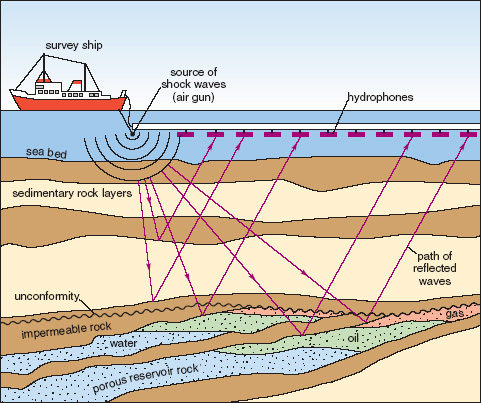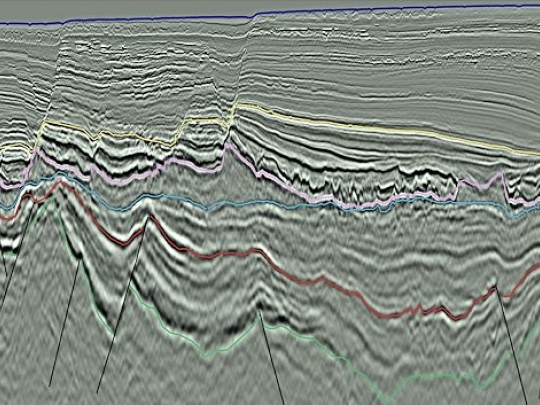

Some of the commons symbols and meanings in Inversion:

* Data or the observed signals is represented as $\mathbf{d}$ (Can be a scalar observation or a vector (like time series))
* Model or the unknown material property represented as $\mathbf{m}$.
* Forward modeling/ Transformation is represented as $\mathbf{G}$ (Can be a linear transformation (matrix) or a non-linear function). It represents the physicsal theory that allows us to predict the observation ($\mathbf{d}$) for a given model ($\mathbf{m}$).

\begin{eqnarray}
\mathbf{d}&=&\mathbf{Gm} &(\texttt{Linear Transformation})\newline
\mathbf{d}&=&G\mathbf{(m)} &(\texttt{Non-linear Transformation})
\end{eqnarray}

In inverse modeling we try to solve for the unknown model property
\begin{equation}
\mathbf{m}^{est}=\mathbf{G}^{-1}(\mathbf{d}^{obs}),
\end{equation}
where $\mathbf{m}^{est}$ is the estimated model, $\mathbf{d}^{obs}$ is the observed data, and $\mathbf{G}^{-1}$ is the inverse transformation

### Linear Systems

\begin{equation}
\mathbf{G}(a_1\mathbf{m}^1+a_2\mathbf{m}^2)=a_1\mathbf{G}(\mathbf{m}^1)+a_2\mathbf{G}(\mathbf{m}^2)
\end{equation}

### Simple linear system

\begin{eqnarray}
2x+4y+3z=10\newline
7x+1y+8z=20\newline
1x+3y+5z=30\newline
\end{eqnarray}

Above system of equations can be represented as:


\begin{eqnarray}
\underbrace{\begin{bmatrix} 
10  \\
20\\
30 \\
\end{bmatrix}}_\mathbf{d}&=&
\underbrace{\begin{bmatrix} 
2 & 4 & 3 \\
7 & 1 & 8\\
1 & 3 & 5 \\
\end{bmatrix}}_\mathbf{G}\times
\underbrace{\begin{bmatrix} 
x  \\
y\\
z \\
\end{bmatrix}}_\mathbf{m}\\
\mathbf{d}&=&\mathbf{Gm}
\end{eqnarray}


In [2]:
G=np.array([[2,4,3],[7,1,8],[1,3,5]])
d=np.array([10,20,30]).reshape(-1,1)
m=np.matmul(np.linalg.inv(G),d).reshape(-1) 
print(f'x={m[0]}\ny={m[1]}\nz={m[2]}\n')

x=-5.348837209302328
y=-0.2325581395348837
z=7.2093023255813975



**Determinedness**

In the above example the number of unknowns, are 3 and the number of observations are 3 as well. Therefor the forward linear transformation matrix $\mathbf{G}$ is a square matrix, which is invertible.

What if, we do not have $\mathbf{G}$ a square matrix? This would happen if $$\texttt{Number of observations}\ne\texttt{Number of Unknowns}$$

<!-- 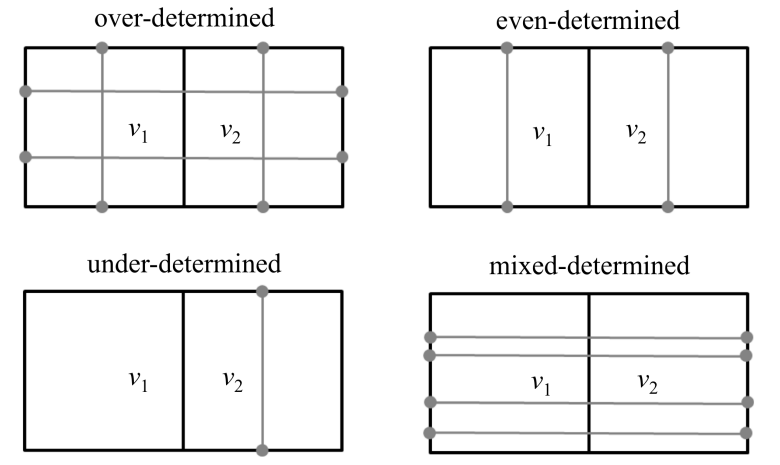 -->
<div>
   <center>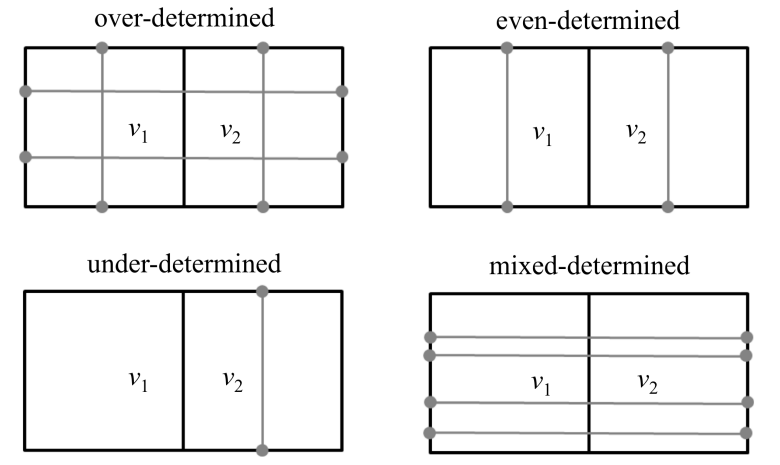<center>
</div>

For a **over**-determined or **under**-determined cases, we cannot calculate the exact solution.

However, Based on the forward modelling equations that produce observational data $\mathbf{d}$, we wish to find a set of model parameters $\mathbf{m}$ that explains it within their errors. The most straightforward, though somewhat
ad hoc, approach is to search for a model $\mathbf{m}^{est}$ that minimises the least-squares misfit functional
\begin{equation}
\chi(\mathbf{m})=\frac{1}{2}\Big(\mathbf{d}^{obs}-\mathbf{Gm}\Big)^T\Big(\mathbf{d}^{obs}-\mathbf{Gm}\Big)
\end{equation}

In the least square sense, 
\begin{equation}
\mathbf{m}^{est}=(\mathbf{G}^T\mathbf{G})^{-1}\mathbf{G}^T\mathbf{d}^{obs}
\end{equation}

**First Arrival Travel-time Tomography** (In a linear setup)

(Classroom example from Prof. Mrinal K. Sen, Inverse Theory, UT Austin)

<!-- 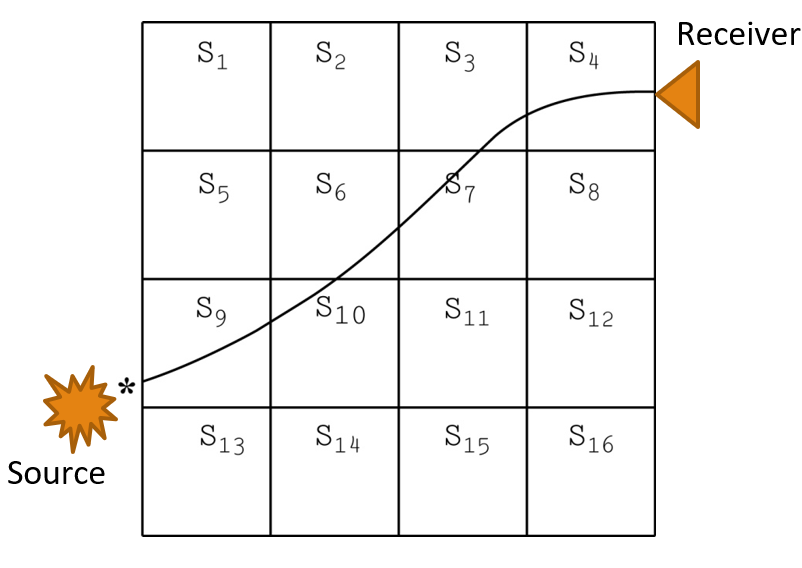 -->
<div>
   <center>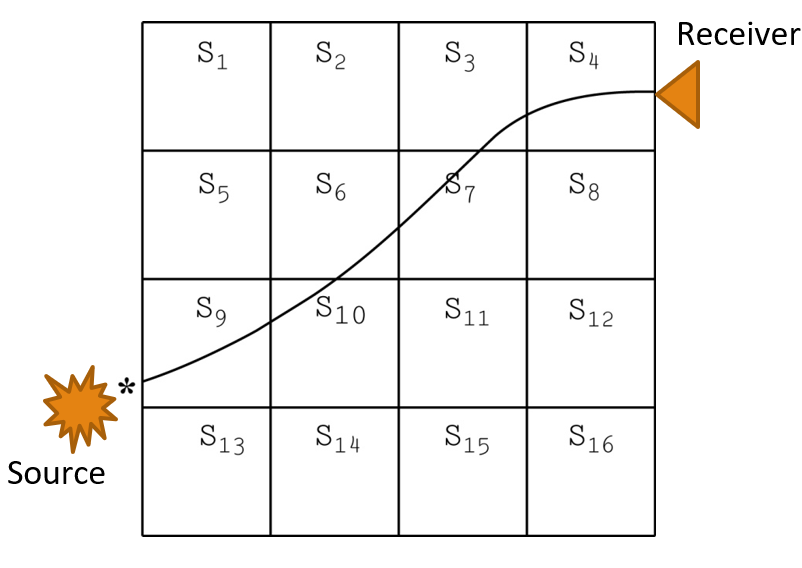<center>
       
</div>
       
\begin{eqnarray}
 t&=&\int_l S\delta l\\
  &=&\Sigma S_il_i
\end{eqnarray}     
<div>
       <center>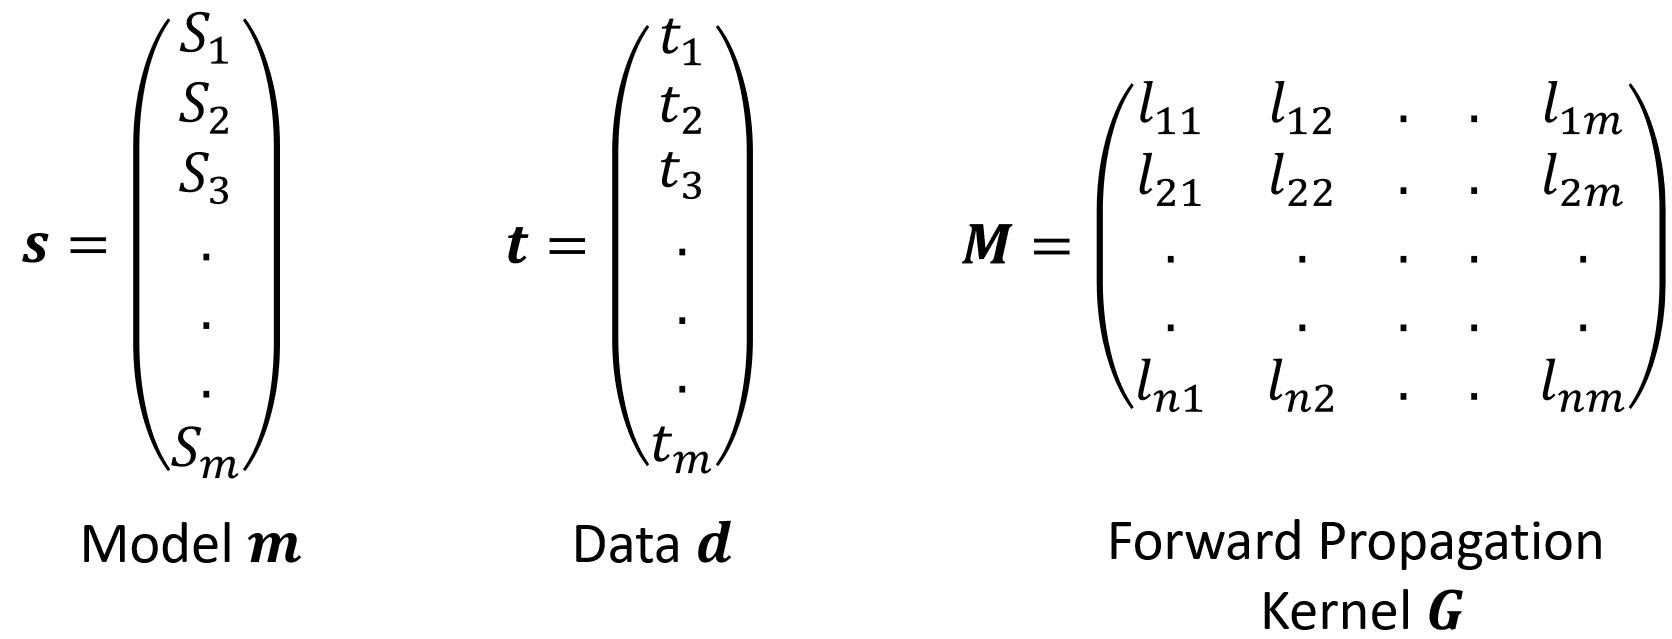<center>
</div>
<!-- 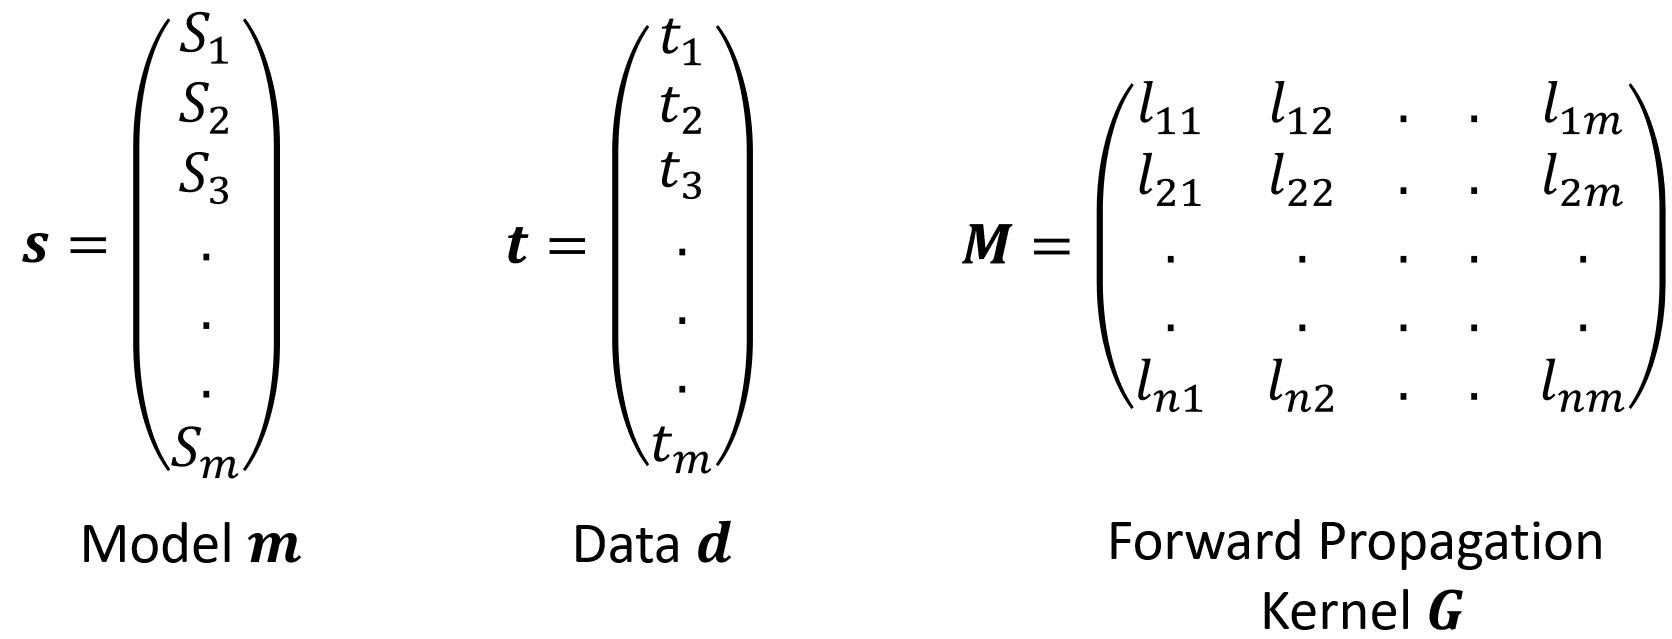 -->


d: (256, 1) G: (256, 256)


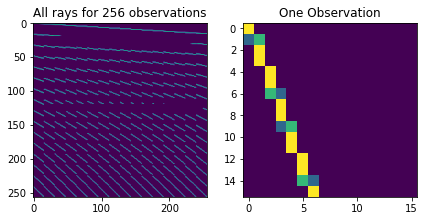

In [3]:
d=np.loadtxt('data/cross_well_d_vector.txt',dtype=float).reshape(-1,1)
G=np.loadtxt('data/cross_well_g_matrix.txt',dtype=float).reshape((256,256),order='F')
print('d:',d.shape,'G:',G.shape)

plt.subplot(1,2,1)
plt.imshow(G)
plt.title('All rays for 256 observations')
plt.tight_layout()
plt.subplot(1,2,2)
plt.title('One Observation')
plt.imshow(G[:,6].reshape(16,16))
plt.tight_layout()
plt.show()

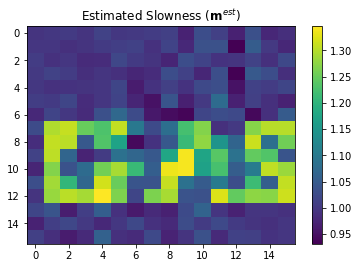

In [4]:
l=20
G_oper=np.matmul(np.linalg.inv(np.matmul(G.T,G)+l**2*np.eye(256)),G.T)
mest=np.matmul(G_oper,d)
plt.imshow(mest.reshape(16,16).T,aspect='auto')
plt.title(r'Estimated Slowness ($\mathbf{m}^{est}$)')
plt.colorbar()
plt.show()

Thus, for a linear system, there exists an analytical approach based on linear algebra, where the Optimized solution can be calculated in a single step.
***

### Non-Linear Systems

Non linear systems represents a complex forward transformation $$\mathbf{d}=G(\mathbf{m}),$$ where $\mathbf{G}$ is now not a linear transformation (matrix), rather combination of non-linear functions. Therefore, $\mathbf{G}^{-1}$ does not exist.

To solve for an optimized solution for a non-linear system, **iterative optimization method** is used.

We begin the iterative optimization process with a starting solution $\mathbf{m}_0$ and update the model with some rule as: $$\mathbf{m}_{i+1}=\mathbf{m}_{i}+\Delta\mathbf{m}.$$

Now, the rule for calculating $\Delta\mathbf{m}$ are very different for different methods. However, broadly it is updated using:
* Gradient based method
* Stochastic based random method
* Hybrid methods

<div>
   <center>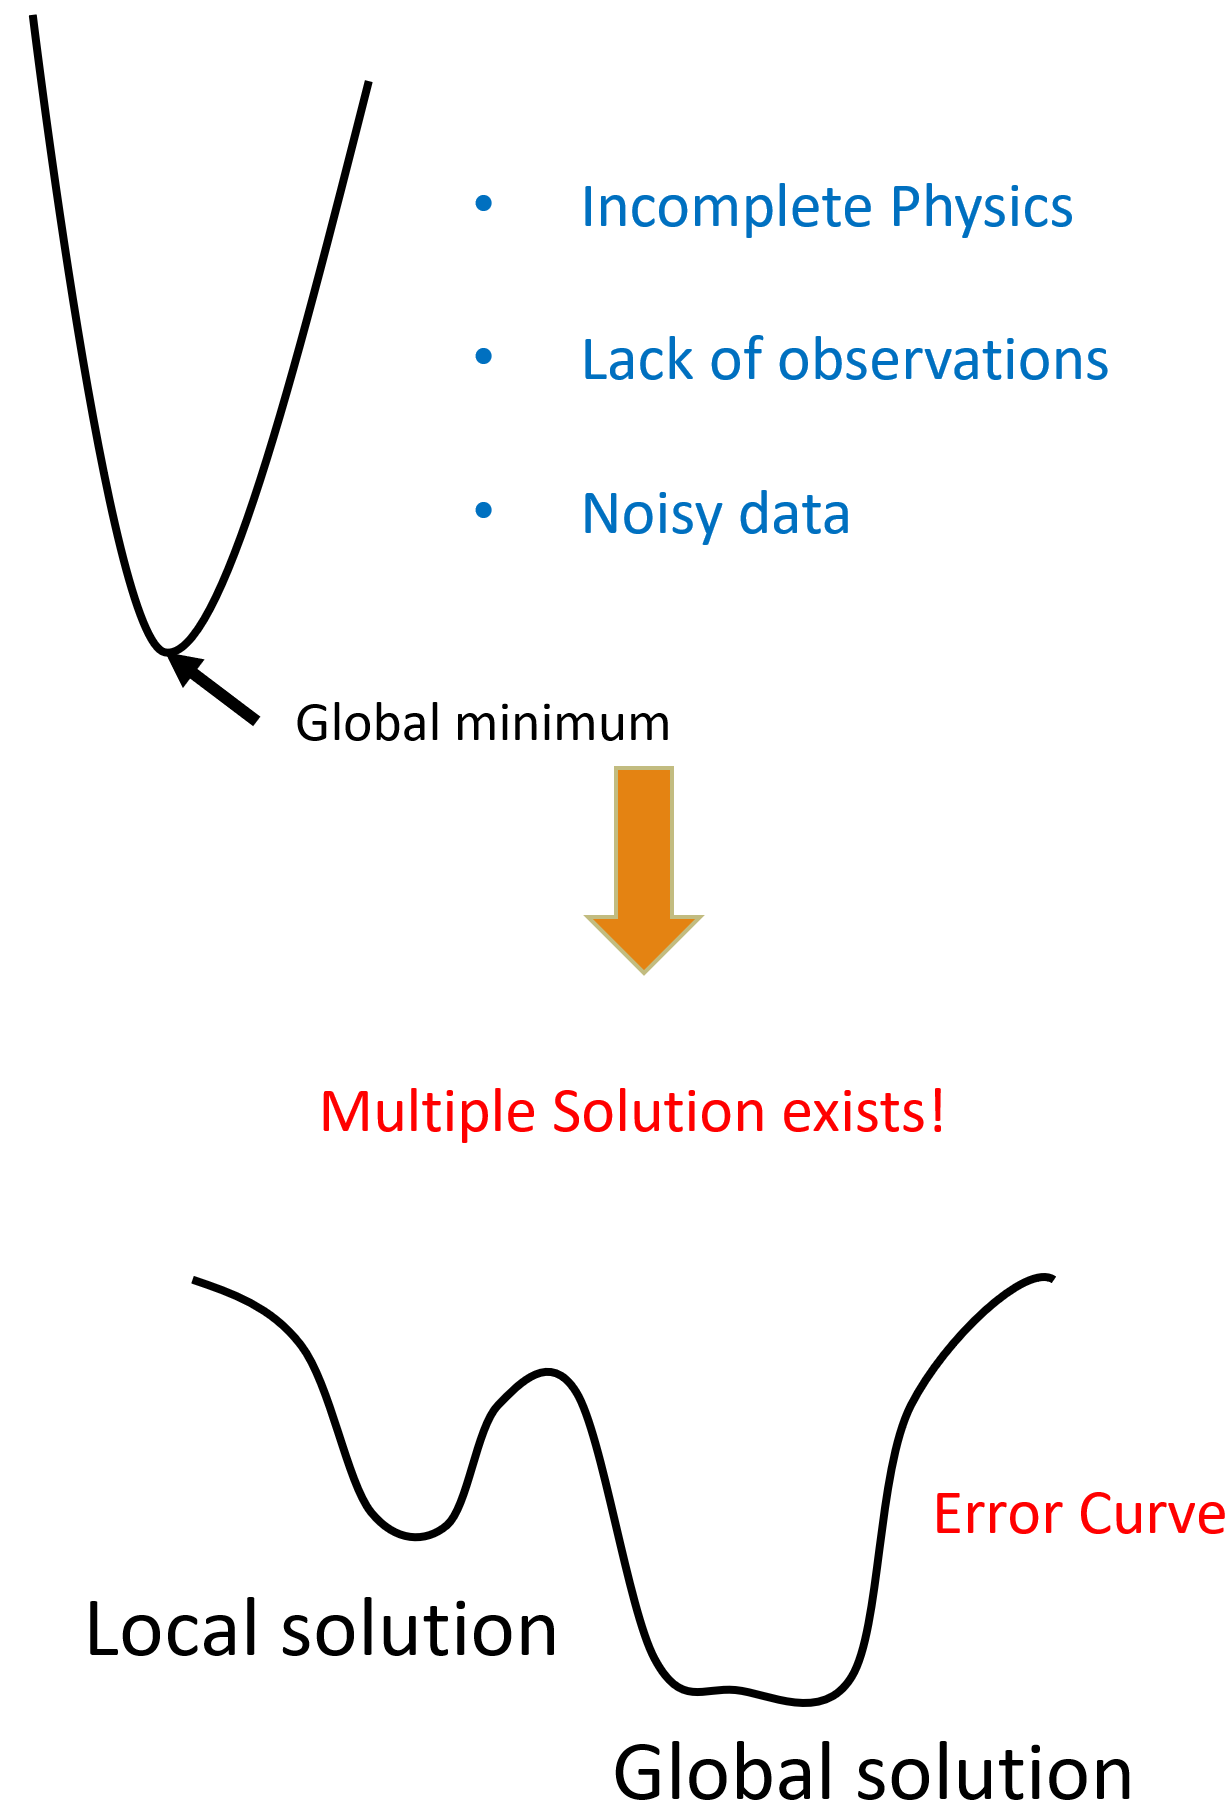
   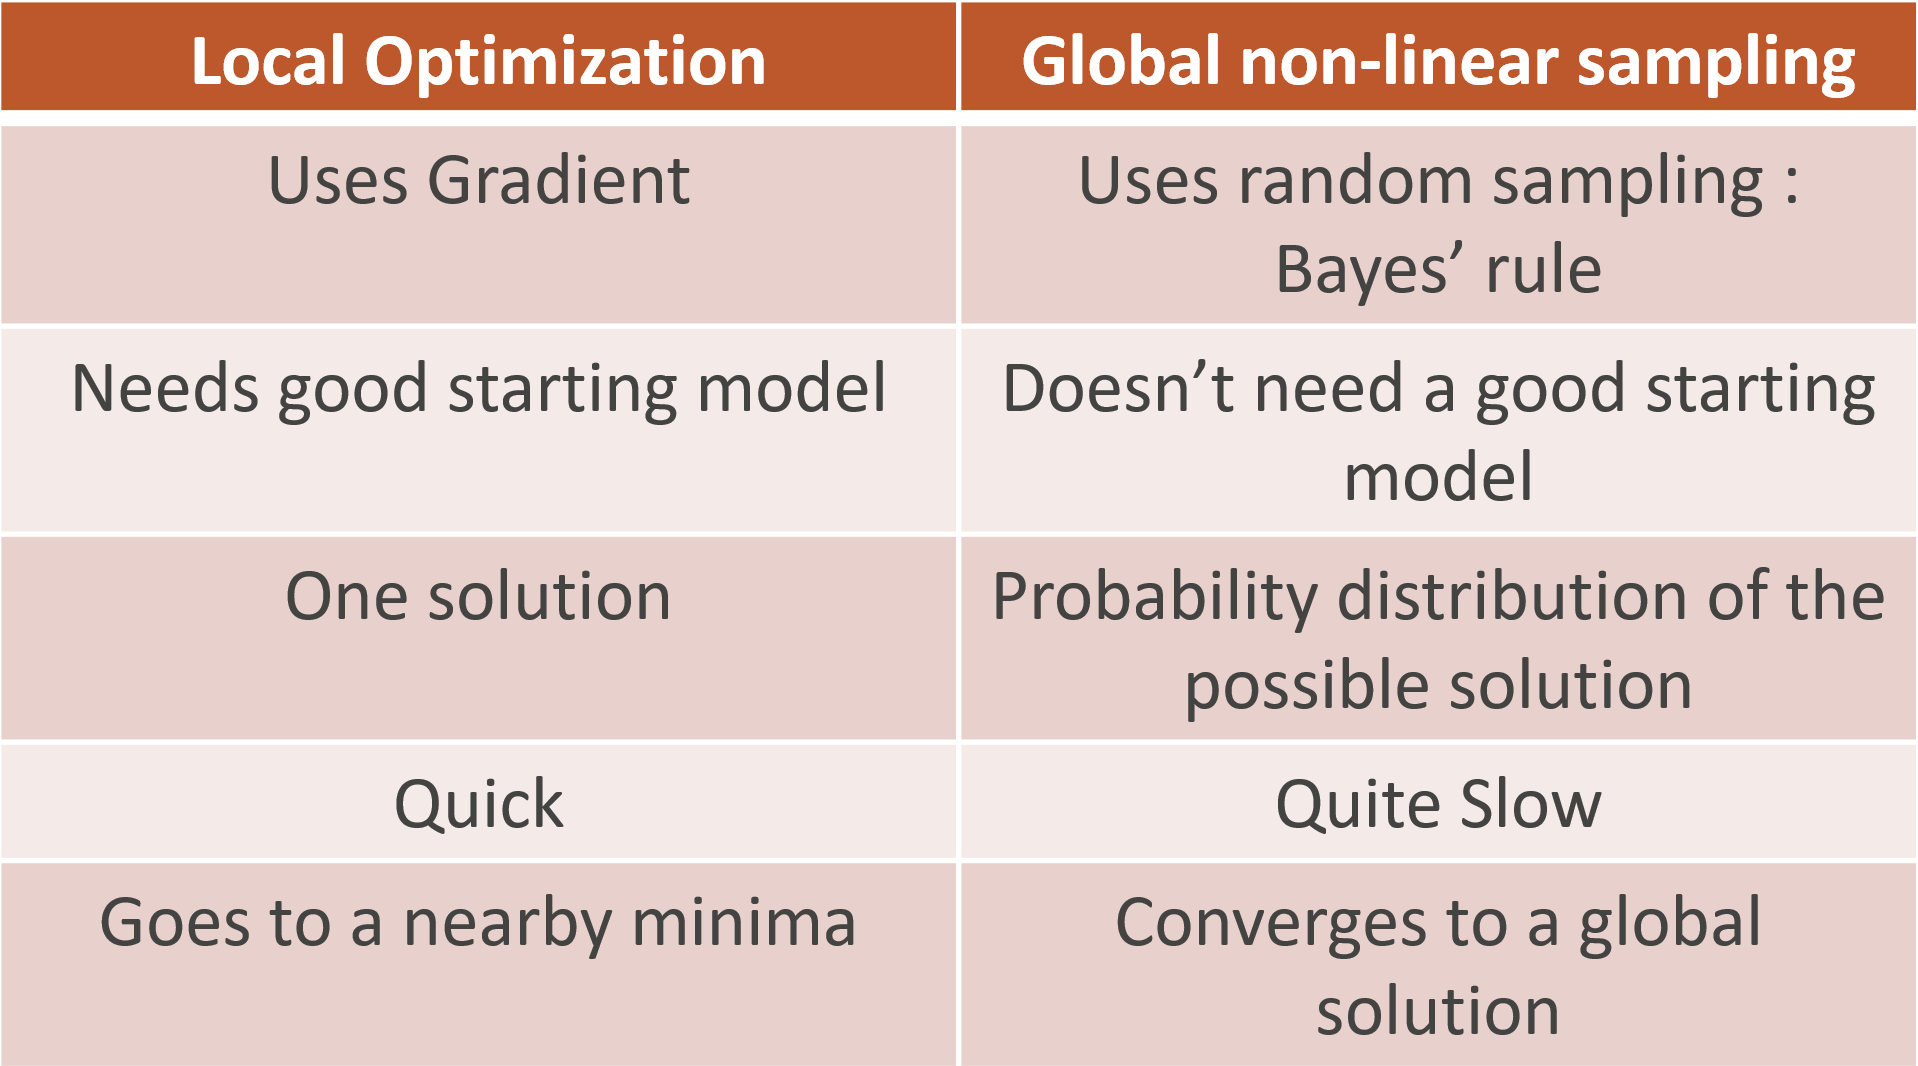<center>
</div>
       
<!-- 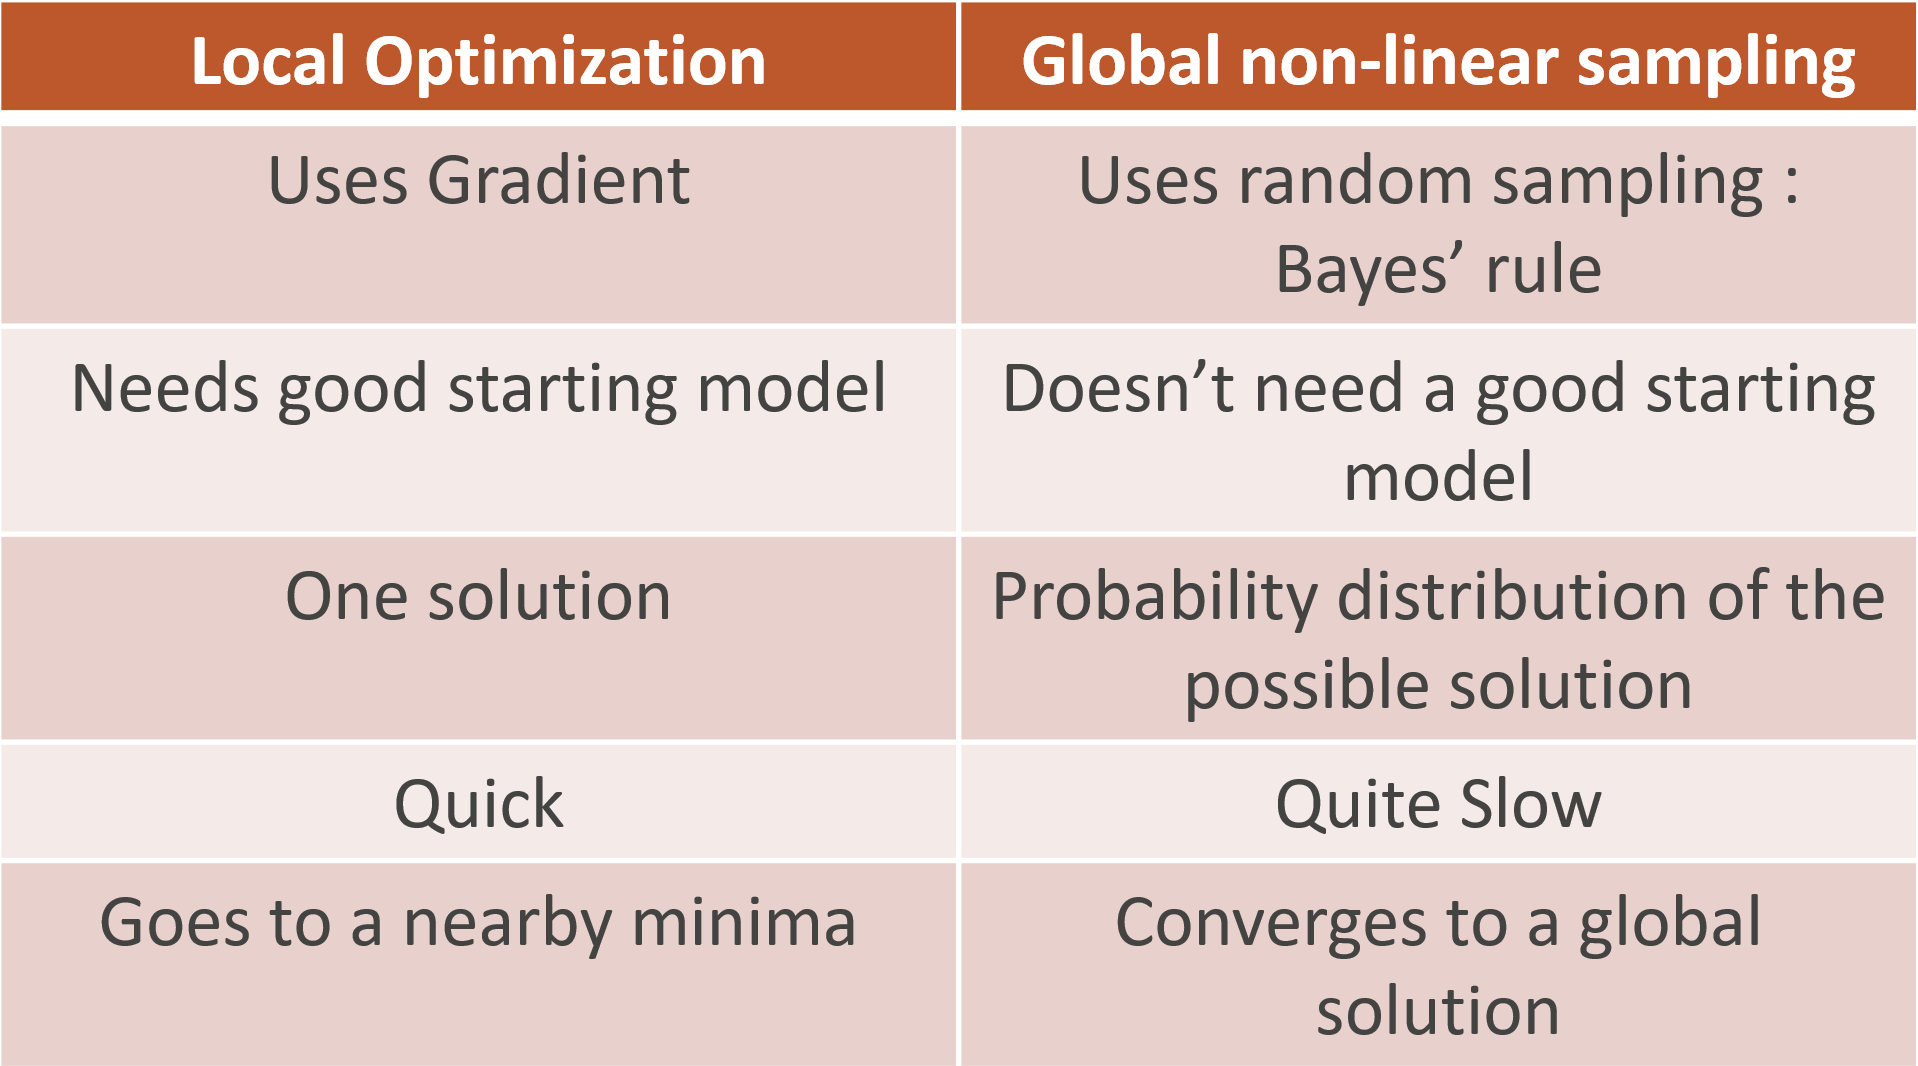 -->

**OBJECTIVE FUNCTION**

$$f(x|a,b,c)=\frac{1}{\sqrt{2\pi}b}e^{\frac{-1}{2}\big[\frac{(x-a)^2+(x-a-c)^2}{b^2}\big]}$$



.


.



.

In [101]:

lim=[1500,6000]
ob=bimodal(3000,100,500,(lim[0]+lim[1])/2,lim[1]-lim[0])
# lim=[100,20000]
# ob=bimodal(3000,100,5000,(lim[0]+lim[1])/2,lim[1]-lim[0])

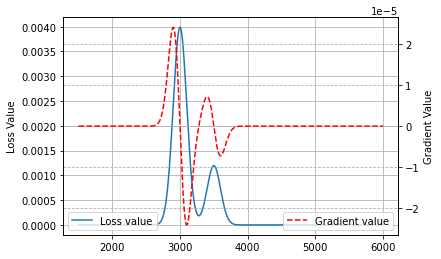

(10000,) (10000, 1)


In [102]:
x=np.linspace(lim[0],lim[1],10000).reshape(-1,1)
l=ob.Llikelihood(x)
g=ob.Glikelihood(x)

plt.plot(x,l,label='Loss value')

plt.ylabel('Loss Value')
plt.grid()
plt.legend(loc='lower left')
ax2=plt.gca().twinx()
ax2.plot(x,g,color='r',label='Gradient value',linestyle='--')
plt.legend(loc='lower right')
plt.ylabel('Gradient Value')
plt.grid(linestyle='--')
plt.show()
print(l.shape,g.shape)

***

### Local Optimization

$\Delta\mathbf{m}$ updates are mainly based on gradient of the loss/objective function; 
\begin{eqnarray}
\Delta\mathbf{m}&=&-&g(\mathbf{m}_i)&\times&\alpha,\newline
&=&-&\frac{\delta E(\mathbf{m}_i)}{\delta\mathbf{m}}&\times&\alpha,\newline
\end{eqnarray}
where $E$ is the objective/loss function, $\alpha$ is the step length. $-$ve sign represents a minimization problem, if $+$ve, then a maximization problem.

*Note*: The direction of update is in the negative gradient direction.


In [7]:
def gradient_descent(m0,fun,grad,step=0.001,iterations=30):
    
    m=m0
    m_all=[m]
    fun_val_all=[fun(m)]
    for i in range(iterations):
        g = grad(m)
        m = m - (-g*step)
        fun_val=fun(m)
        m_all.append(m)
        fun_val_all.append(fun_val)
    return np.array(m_all),np.array(fun_val_all)

In [8]:
m0=np.array(2700.).reshape(-1,1)
objective_fun=ob.Llikelihood
gradient_fun=ob.Glikelihood
m_out,f_out = gradient_descent(m0,objective_fun,gradient_fun,iterations=500,step=100000)
print(f'Start:{m_out.squeeze()[0]}\nFinal:{m_out.squeeze()[-1]}')

Start:2700.0
Final:2999.746191234467


In [9]:
anim=animation1d(m_out,x,objective_fun)  
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [10]:
m0=np.array(3725.).reshape(-1,1)
objective_fun=ob.Llikelihood
gradient_fun=ob.Glikelihood
m_out,f_out = gradient_descent(m0,objective_fun,gradient_fun,iterations=500,step=100000)
print(f'Start:{m_out.squeeze()[0]}\nFinal:{m_out.squeeze()[-1]}')

Start:3725.0
Final:3509.8403016195834


In [11]:
anim=animation1d(m_out,x,objective_fun)  
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [12]:
m0=np.array(4500.).reshape(-1,1)
objective_fun=ob.Llikelihood
gradient_fun=ob.Glikelihood
m_out,f_out = gradient_descent(m0,objective_fun,gradient_fun,iterations=500,step=100000)
print(f'Start:{m_out.squeeze()[0]}\nFinal:{m_out.squeeze()[-1]}')
anim=animation1d(m_out,x,objective_fun)  
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

Start:4500.0
Final:4500.0


**Other Local Optimization methods**

* Newton's method
* Conjugate gradient
* BFGS ...

The main difference between the algorithms is the way it handles the gradient calculation, objective function, or step length. One method might be better in certain situations to handle a particular case. However, they cannot jump a local minimum and highly depend on the starting model. It also does not provide any idea about the uncertainty of the estimated model.
***

### Global Optimization / Sampling

Global optimization is a branch of applied mathematics and numerical analysis that attempts to find the global minima or maxima of a function or a set of functions on a given set. Here, we will mainly focus on Stochastic methods.

*Stochastic*: randomly determined; having a random probability distribution or pattern that may be analyzed statistically but may not be predicted precisely.

One of the most common technique is to represent our Optimization/Inverse problem in terms of Bayesian Framework.

Any inverse problem can be represent in terms of Bayes' rule: 
\begin{eqnarray}
\text{Posterior} &=& \frac{\text{Prior}\times\text{Likelihood}}{\text{Evidence}}\newline
\pi(\textbf{m}|\textbf{d}) &=& \frac{p(\textbf{m})\times p(\mathbf{d}|\mathbf{m})}{p(\mathbf{d})}\newline
&\propto& p(\textbf{m})\times p(\mathbf{d}|\mathbf{m})
\end{eqnarray}
<table><tr>
    <td>
        <div>
            <center>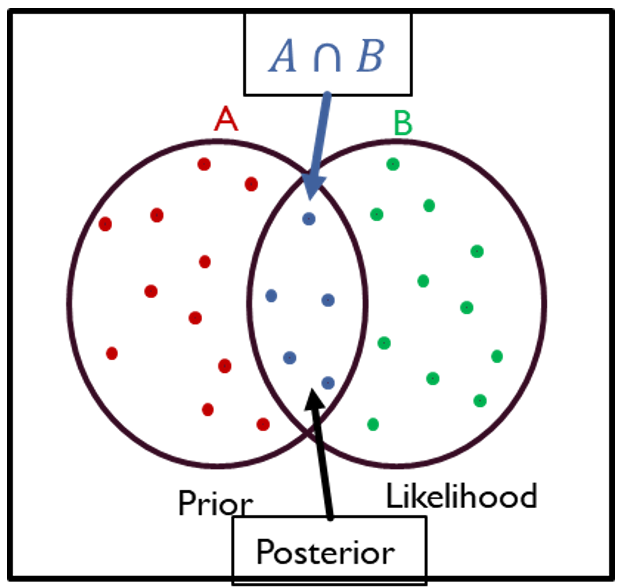<center>
        </div>
    </td>
    <td>
        <div>
            <ul>
                <li><b>Prior</b>: All sets of model which satisfies our Prior knowledge of the physical princeiples of the system.</li>
                <li><b>Likelihood</b>: All sets of model which satisfies the observed data.</li>
                <li><b>Posterior</b>: Intersection of the models which satisfies Prior and Likelihood.</li>
            </ul>
        </div>
    </td>
                
</tr></table>
    
We want to sample from the Posterior distribution; however, no analytical function can be used to describe it; since it would require to calculate the denominator, which is the normalization factor / *evidence*. $$p(d)=\int_{\textbf{m}} p(\textbf{m})\times p(\mathbf{d}|\mathbf{m})\delta m,$$ this exhaustive calculation over the entire model space is not possible.
    
Therefore we make use of the Markov Chain Monte Carlo (MCMC) type of methods, which takes into account the ratio of the posterior probability of the subsequent sampled models and the denominator cancels out.
    


**What is Sampling? Why it is important? Why is this term specifically used in Stochastic Optimization?**

In general any optimization problem solves (a point estimate which maximizes the posterior density) $$f(\hat m),\hat m=\text{argmax} p(m)$$

However, we are not interested in the point estimate, rather integrating over the entire model space $$E[f(m)]=\int \delta m p(m) f(m),$$ which could give us a global summary. All of our statistical questions can be answered through expectations.

Best way to get all possible solutions is to perform brute-force grid search!
However, for a 1D, 2D problem for a finite search space, it might be feasible. But not for multi-dimensional model space.
    
*Curse of Dimensionality*: There is an exponential increase in volume associated with adding extra dimensions to a mathematical space. In addition to that, useful samples are quite sparsely located in the high-dimensional volumes.
    
Therefore, in stochastic optimization, we perform random sampling (Guided by some distribution!) and look at its posterior probability value.
Everything about the various stochastic sampling is about having efficient integrals.
    
<!-- **Important Terminologies**:
    
* Proposal Distribution
* Marginal Distribution
* Maximum-a-posteriori (MAP) model
* Mean Model
 -->
***

### Random Search

In [121]:
def random_search(m0,loss,limit,iterations=300):
    
    m=m0
    loss_val=loss(m0)
    m_acc=[]
    m_all=[m]
    for i in range(iterations):
        m_new = np.array(np.random.uniform(low=limit[0],high=limit[1])).reshape(m.shape)
        loss_val_new=loss(m_new)
        
        m = m_new
        loss_val = loss_val_new
        m_acc.append(m)
        m_all.append(m_new)
        
    return np.array(m_acc),np.array(m_all)

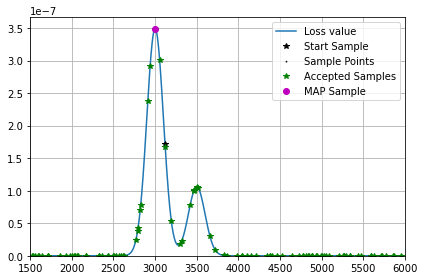

In [122]:
m0=np.array(np.random.uniform(low=lim[0],high=lim[1])).reshape(-1,1)
objective_fun=ob.Lposterior
m_out_acc_rs,m_out_all_rs= random_search(m0,objective_fun,[1500,6000],iterations=100)
plot_distribution(x,lim,objective_fun,m0,m_out_acc_rs,m_out_all_rs)

***

### Metropolis-Hastings MCMC

 
* given:
    * $f$, the likelihood distribution
    * $P$, the Prior distribution
    * $Q$, the transition model
    * $\theta_0$, a first guess for $\theta$
    * $\theta = \theta_0$
    
* for $n$ samples
    * $p =  f(\Theta=\theta)P(\theta)$
    *  $\theta^\prime = Q(\theta_i)$
    *  $p^\prime = f(\Theta=\theta^\prime)P(\theta^\prime)$
    *  $ratio = \dfrac{p^\prime}{p}$
    * generate a uniform random number $r$ in [0,1]
    *  if $r<ratio$:
        * set $\theta_i = \theta^\prime$
    

In [111]:
def MHMCMC(x0,loss,iterations=300):
    x=x0
    
    loss_val=loss(x0)
    x_acc=[x]
    
    loss_val_acc=[loss_val]
    x_all=[x]
    
    loss_val_all=[loss_val]
    for i in range(iterations):
        #random walk
        x_new = np.random.randn()*100+x
        
        loss_val_new=loss(x_new)
        acc=False
        deltaE=loss_val_new - loss_val
        u=np.random.rand()
        if deltaE<0:
            
            acc=True
            case=1
        elif np.exp(-deltaE) > u:
            
            acc=True
            case=2
        else:
            acc=False
            case=3
            
        
        if acc:
            x = x_new
            
            loss_val = loss_val_new
            x_acc.append(x)
            
            loss_val_acc.append(loss_val)
        x_all.append(x_new)
        
        loss_val_all.append(loss_val_new)

    return np.array(x_acc),np.array(x_all)
    

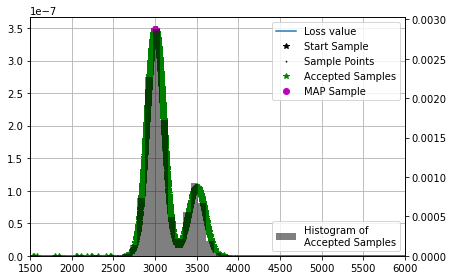

In [116]:
m0=np.array(1000.).reshape(-1,1)
m_out_acc_mh,m_out_all_mh= MHMCMC(m0,ob.Llnposterior,iterations=5000)
plot_distribution(x,lim,ob.Lposterior,m0,m_out_acc_mh,m_out_all_mh,hist=True)

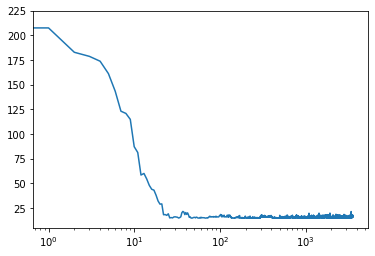

In [117]:
plt.semilogx(ob.Llnposterior(m_out_acc_mh))
plt.show()

**Analysis Random Walk Metropolis Hastings MCMC**
$$T(\theta,\theta')=\underbrace{\mathcal{N}(\theta'|\theta,\sigma^2)}_{\substack{\text{Random walk}\\ \text{Diffusion}}}\times\underbrace{\min\Big(1,\frac{\pi(\theta')}{\pi{\theta}}\Big)}_{\substack{\text{Correction for}\\ \text{Diffusion}}}$$<div>
   <center>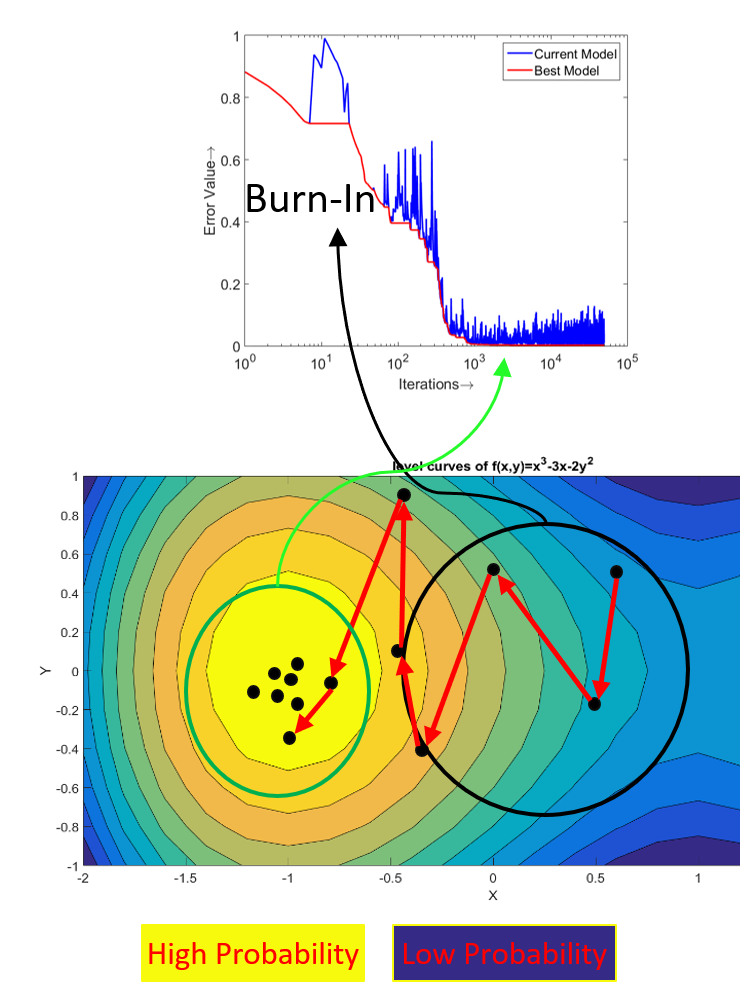<center>   
</div>

**Gibbs Sampler**
$$T(\theta,\theta')=\underset{i}{\prod}\pi(\theta'_i\setminus \theta_{j\setminus i})$$
It requires these conditional samples. For a 2D parameterization first sample $\theta_1\rightarrow\theta_2$, then $\theta_2\rightarrow\theta_1$

<div>
   <center>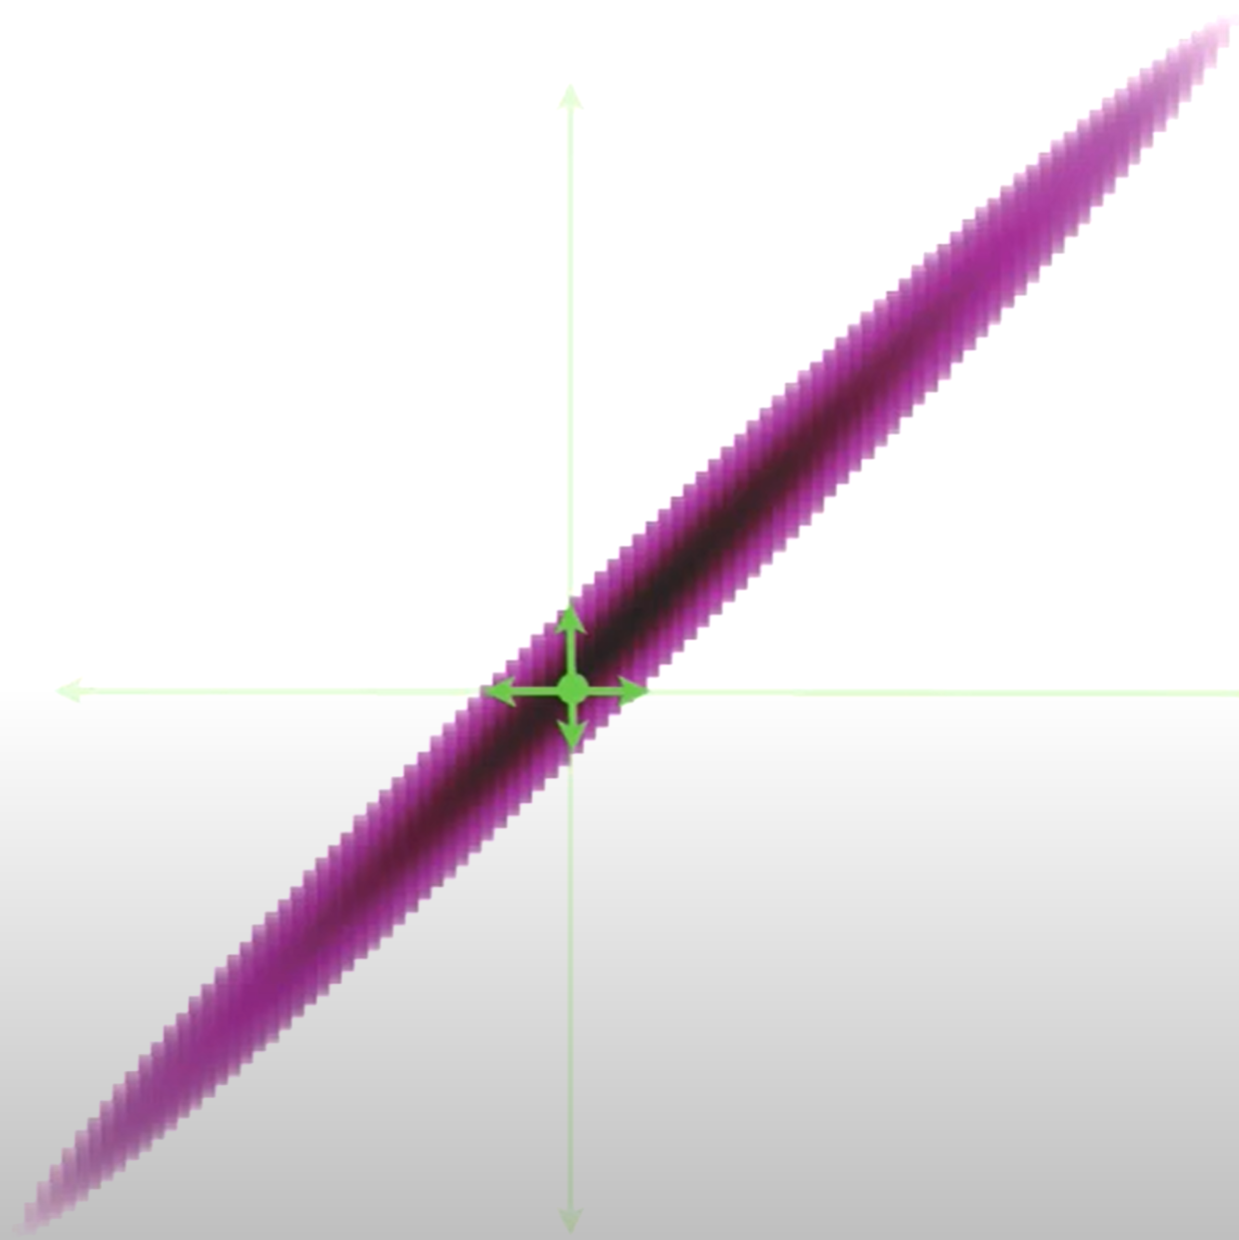<figcaption>Highly correlated target distribution (model space)</figcaption><center>   
</div>
Simple Random Walking MCMC   
<div>
   <center>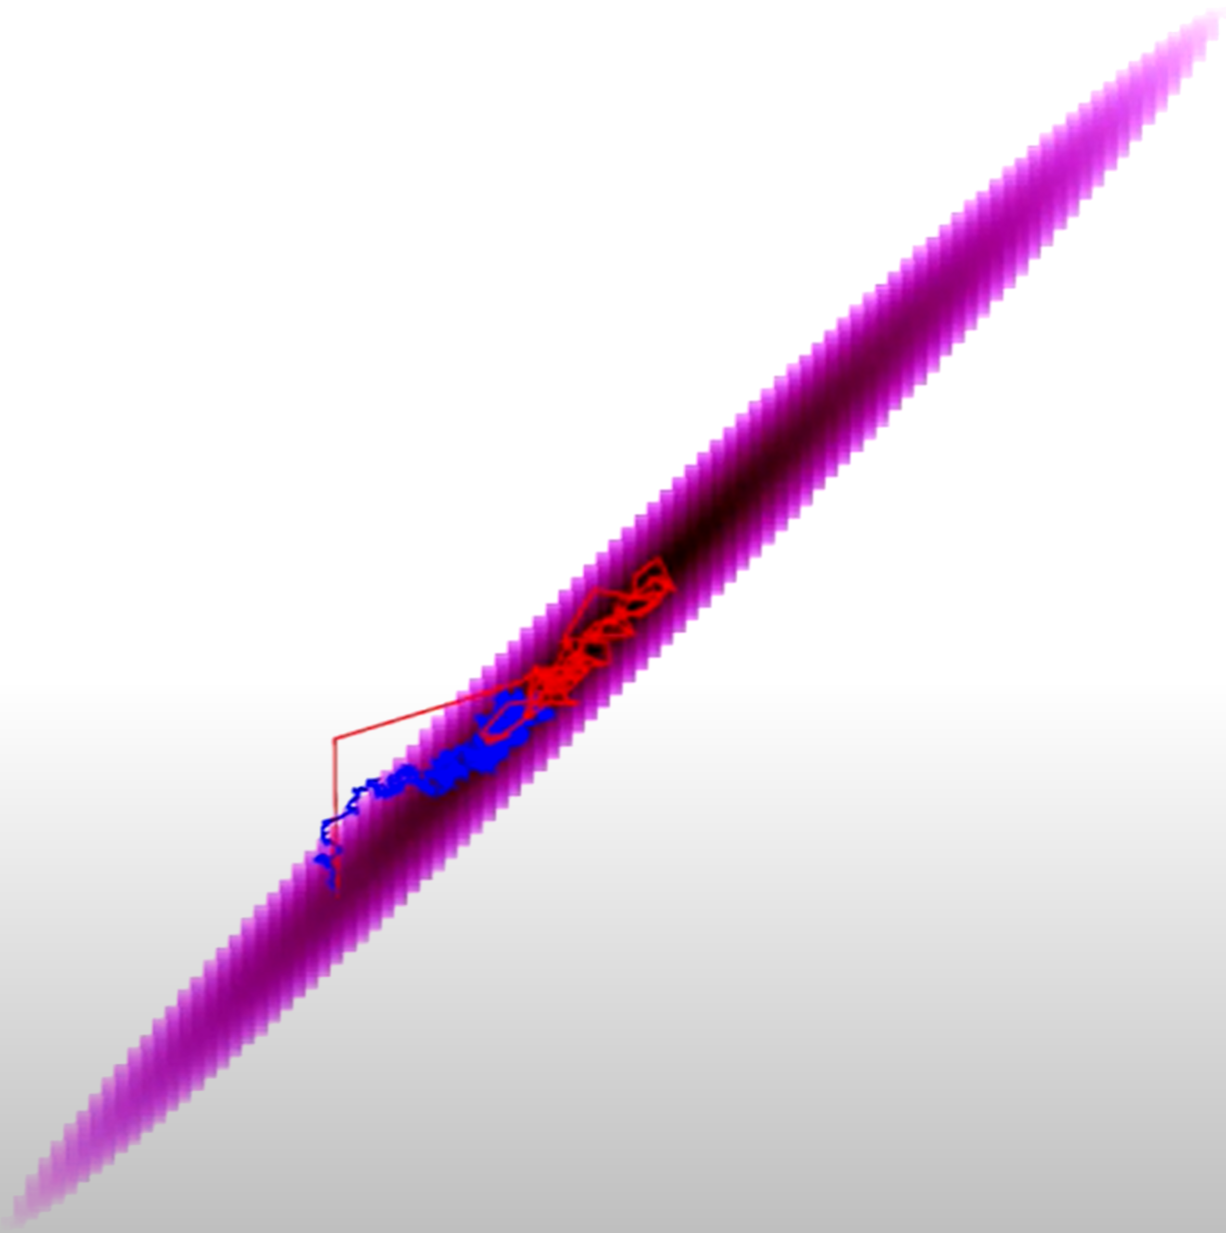<figcaption>Sampling using MCMC (blue), Gibbs (Green)</figcaption><center>   
</div>
       
***

#### Hamiltonian Monte Carlo

The key for coherent exploration of the mode space is to understand the geometry of the system.
<div>
<center>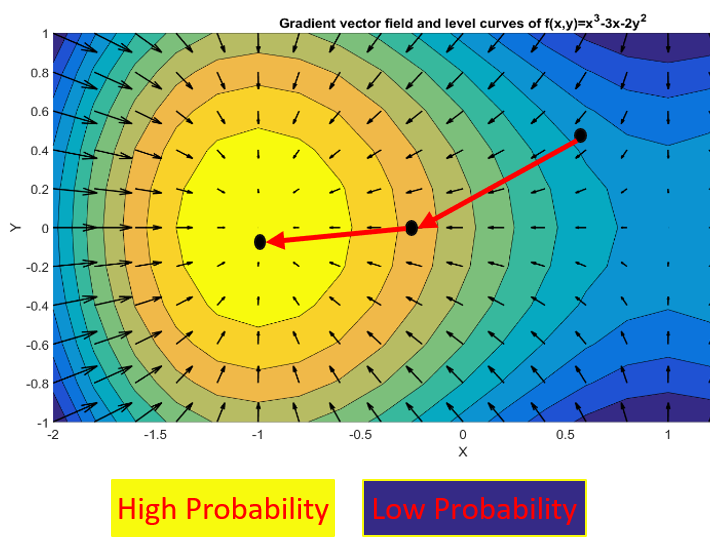</center>
</div>
Hamiltonian Monte Carlo (HMC) is a Markov chain Monte Carlo (MCMC) method that uses the derivatives of the density function being sampled to generate efficient transitions spanning the posterior.

Now, to get the geometry of the system, we cannot get it from just model space $\theta$. This is achieved by introducing an auxiliary variable.

We double our space as $\theta\rightarrow(\rho,\theta)$



HMC introduces auxiliary momentum variables $\rho$ and draws from a joint density $$\pi(\rho,\theta)=\pi(\rho|\theta)\pi(\theta).$$

Here we describe Hamiltonian Energy (Total Energy) as 
\begin{eqnarray}
H(\rho,\theta) &=& -\log\pi(\rho,\theta)\\
&=& -\underbrace{\log\pi(\rho|\theta)}_{\substack{\text{K}\\ \text{Kinetic Energy}}} - \underbrace{\log\pi(\theta)}_{\substack{\text{V}\\ \text{Potential Energy}}}
\end{eqnarray}

There are multiple ways to select the $\pi(\rho|\theta)$. Most straightforward is to choose as $$\pi(\rho|\theta)=\mathcal{N}(0,M).$$ This particular form of choice is called Euclidian Hamiltonian Monte Carlo and the Kinetic Energy term takes the form $$K=\frac{1}{2}\rho_i\rho_j(M^{-1})^{ij},$$ which is quite close to similar to our Kinetic Energy term in classical mechanics.
<div>
<center>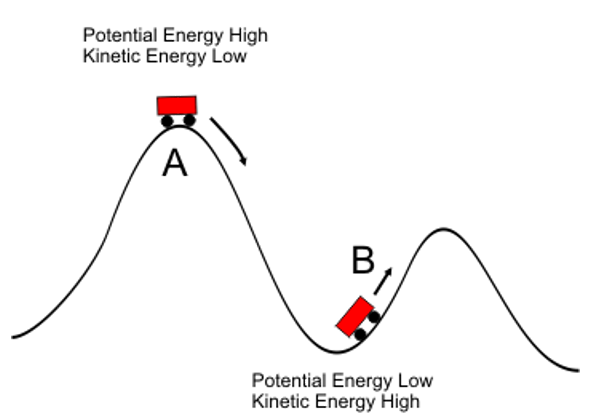</center>
</div>

We evolve the system $(\theta, \rho)$ according to Hamilton’s equations: 
\begin{eqnarray}
\frac{d \theta}{dt} &=& \frac{\partial H}{\partial \rho} &=& \frac{\partial K}{\partial \rho} + \frac{\partial V}{\partial \rho}\\
\frac{d \rho}{dt} &=& -\frac{\partial H}{\partial \theta} &=& -\frac{\partial K}{\partial \theta} - \frac{\partial V}{\partial \theta}
\end{eqnarray}

We can then simplify Hamilton’s equations to:

\begin{eqnarray}
\frac{d \theta}{dt} &=& \rho M^{-1} \\
\frac{d \rho}{dt} &=& - \frac{\partial V}{\partial \theta}
\end{eqnarray}

We take the help of leap frog integrator to integrate the above differentials to calculate the position ($\theta$) and the momentum ($\rho$).
\begin{eqnarray}
\rho &\leftarrow& \rho - \frac{\epsilon}{2}\frac{\delta V}{\delta\theta}\\
\theta &\leftarrow& \theta - \epsilon M^{-1}\rho\\
\rho &\leftarrow& \rho - \frac{\epsilon}{2}\frac{\delta V}{\delta\theta}\\
\end{eqnarray}
<div>
<center>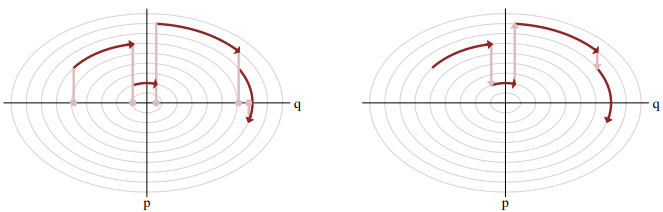</center>
</div>
Gradient based HMC Examples
<div>
   <center>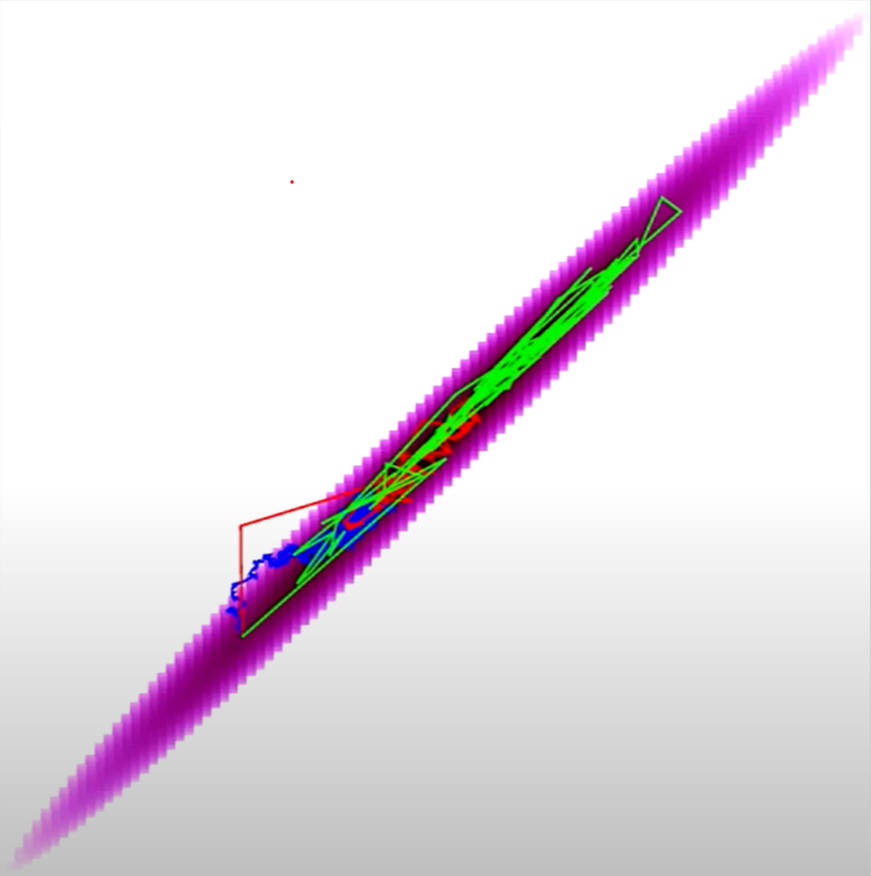<figcaption>Sampling using HMC</figcaption><center>   
</div>
<div>
   <center>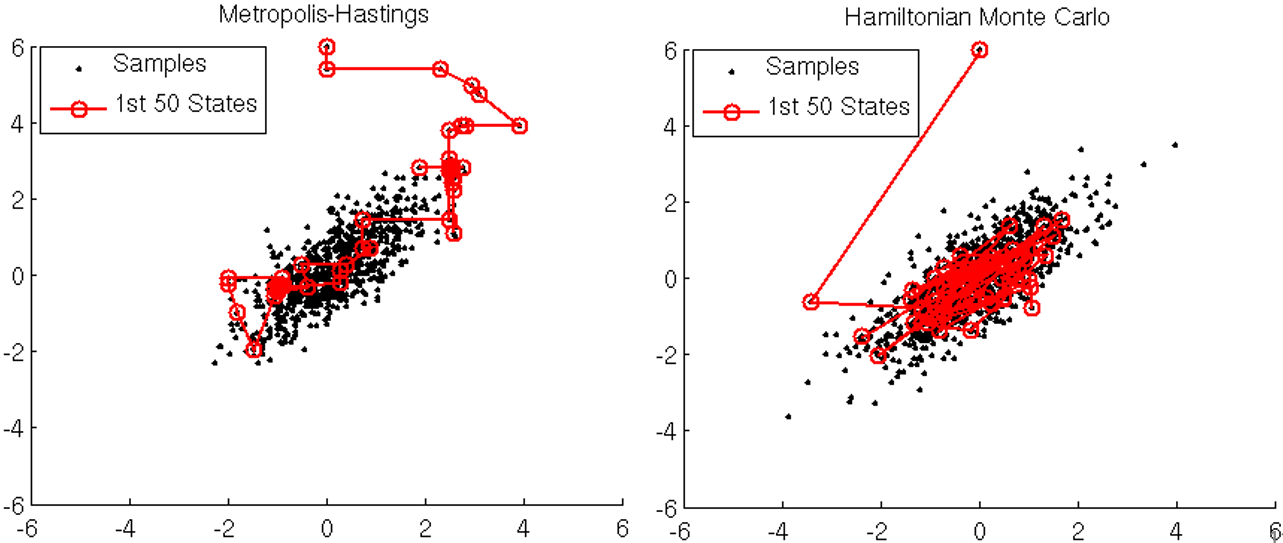<center>   
</div>       
<!--        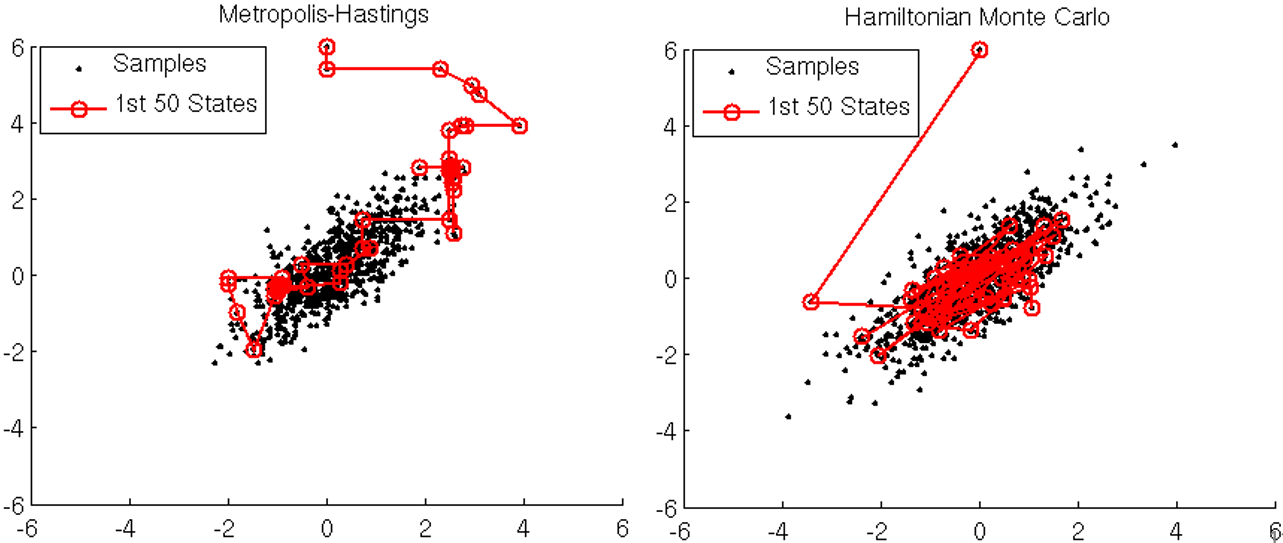 -->
<!--        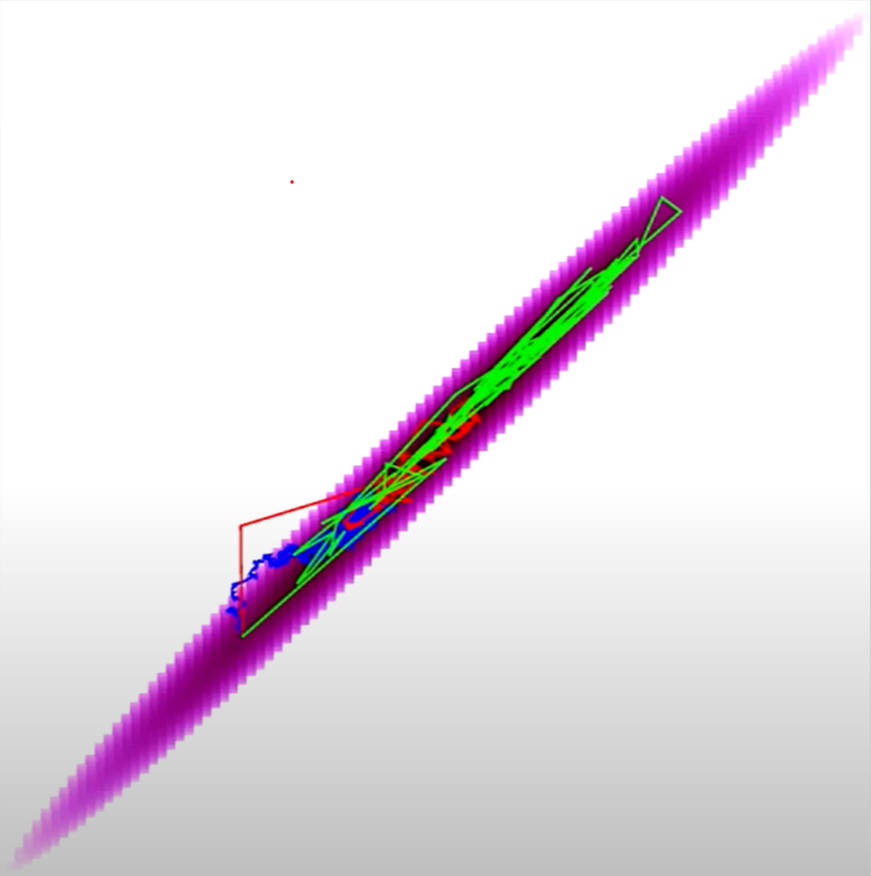 -->

In [128]:
def hmc_leapfrog(x0,df,f,epsilon=0.001,L=10,M=None):    
    
    # Initial State
    x=x0
    
    if M is None:
        M=np.eye(x0.size)    
    
    f0=f(x0)
    g0=df(x0)
    
    
    Minv=np.linalg.inv(M)
    
    # Sample Random Momentum
    p0=np.random.normal(0,1,x0.shape)
          
    ## Simulate Hamiltonian Dynamics
    x_cluster=[x0]
    p_cluster=[p0]
    # First Half Step of Momentum
    dU=df(x.reshape(1,-1))
    
    pStar=p0-epsilon/2*dU
    
    # First Full Step for Position/Sample
    xStar=x+epsilon*pStar
   
    # Full Steps
        
    for jL in range(L-1):
            # Momentum
        dU=df(xStar)
            
        pStar=pStar-epsilon*dU
            
        # Position/Sample
        xStar=xStar+epsilon*pStar
        x_cluster.append(xStar)
        p_cluster.append(pStar)
            
    # Last Half Step of Momentum
        
    dU=df(xStar)
        
    pStar=pStar-epsilon/2*dU
        
    # Evaluate Energies at Start and End of Trajectory
    U0=f(x0)    
    UStar=f(xStar.reshape(1,-1))
    
    K0=0.5*np.matmul(np.matmul(p0.T.transpose(),Minv),p0.T).squeeze(axis=1)
    KStar=0.5*np.matmul(np.matmul(pStar.T.transpose(),Minv),pStar.T).squeeze(axis=1)
   
    
         
    H0=U0+K0
    HStar=UStar+KStar
    
    # Acceptance/Rejection Criterion
    alpha=np.min([1,np.exp(np.array((H0-HStar),dtype='float128'))])
        
    u=np.random.rand(1)
    
    accepted = False
    acc='False'
    if u< alpha:
        accepted = True
        acc='True'
        
#     pdb.set_trace()
    Energy={'H0':H0,'U0':U0,'K0':K0,'H*':HStar,'U*':UStar,'K*':KStar}
    x_cluster=np.array(x_cluster)
    p_cluster=np.array(p_cluster)
    return xStar,accepted,x_cluster,p_cluster,Energy

100%|██████████| 500/500 [00:40<00:00, 12.21it/s]


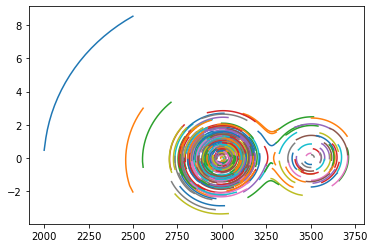

In [129]:

p_traj_all=[]
m_traj_all=[]
m_out_acc_hmc=[]
m_out_all_hmc=[]
nsamples=500
ix0=np.array(2000.).reshape(-1,1)#m0
for i in tqdm(range(nsamples)):

    ix,iacceptance,ix_cluster,ip_cluster,iEnergy=hmc_leapfrog(ix0,ob.Glnposterior,
                                                       ob.Llnposterior,epsilon=5,L=20)
    
    ix0=ix 
    m_out_acc_hmc.append(ix)
        
    m_out_all_hmc.append(ix)
    p_traj_all.append(ip_cluster)
    m_traj_all.append(ix_cluster)
  
    plt.plot(ix_cluster.squeeze(),ip_cluster.squeeze())

plt.show()
m_out_acc_hmc=np.array(m_out_acc_hmc).squeeze()
m_out_all_hmc=np.array(m_out_all_hmc).squeeze()
p_traj_all=np.array(p_traj_all).squeeze()
m_traj_all=np.array(m_traj_all).squeeze()

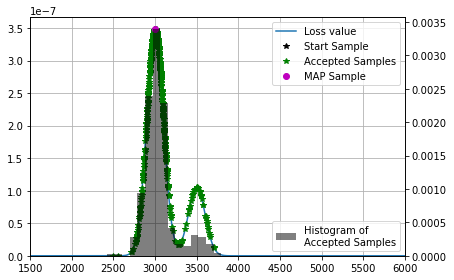

In [130]:
plot_distribution(x,lim,ob.Lposterior,m0,m_out_acc_hmc,hist=True)

In [21]:
xlim=(2000,4000)
anim=animationHMCpaths(m_traj_all,p_traj_all,xlim,nsamples*20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

*Disadvantages of HMC*

* Derivative $\delta V/\delta \theta$ can be computationally expensive.
* M - Mass Matrix if chosen wrong can make HMC wrong.
* $\epsilon$:
    * big: lots of error while integrating leading to lots of sample rejection.
    * small: high acceptance but will take forever to reach anywhere.
* L: When should the integration be stopped?
***

### Trans-dimensional Sampling

\begin{eqnarray}
\text{Posterior} &=& \frac{\text{Prior}\times\text{Likelihood}}{\text{Evidence}}\newline
\pi(\textbf{m},k|\textbf{d}) &=& \frac{p(k)\times p(\textbf{m}|k)\times p(\mathbf{d}|\mathbf{m},k)}{p(\mathbf{d})}\newline
&\propto& p(k)\times p(\textbf{m}|k)\times p(\mathbf{d}|\mathbf{m},k)
\end{eqnarray}



<div>
    <center>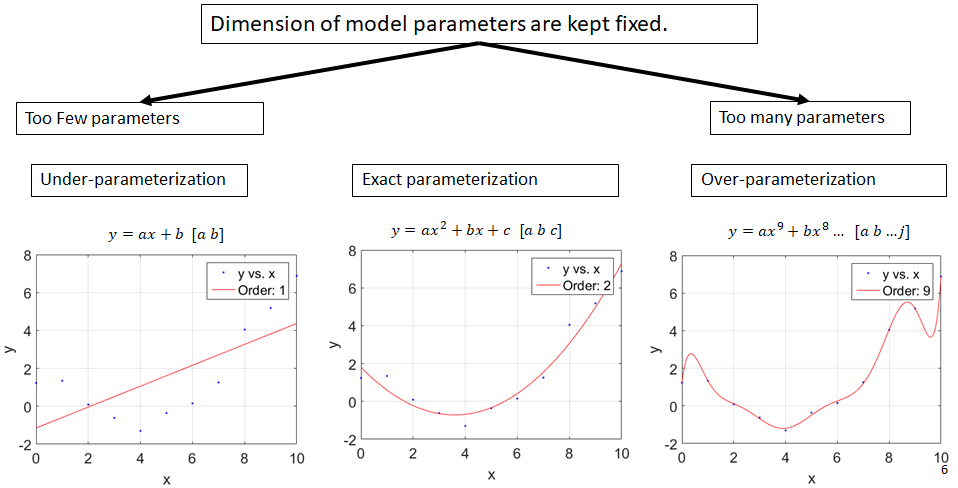</center>
</div>
<!-- 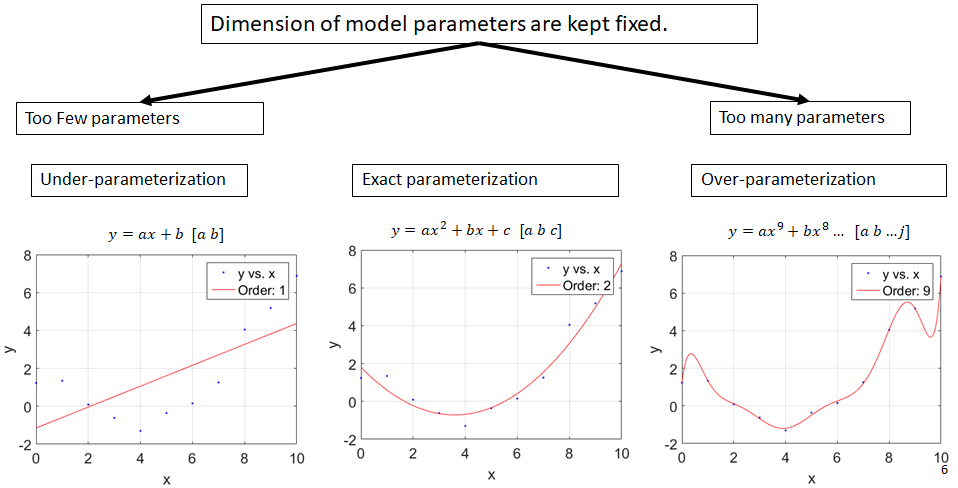 -->

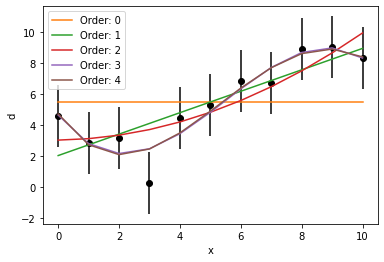

In [25]:
# Forward problem function. -------------------------------------------------
## taken from Dr. Andreas Fichtner's notes
def forward(m, x, Nm):
    """
    Definition of the forward problem, which is a polynomial of degree Nm-1.

       y= m[0] + m[1]*x + m[2]*x**2.0 + ... + m[Nm-1]*x**(Nm-1) .

    :param m: Coefficients of the polynomial. Numpy array of dimension Nm.
    :param x: Scalar argument of the polynomial.
    :param Nm: Model space dimension.
    :return: Value of the polynomial at x.
    """

    d = 0.0

    for k in range(Nm):
        d+=m[k]*(x**(k))

    return d


# Input parameters for computation of artificial data. ----------------------

# Measurement locations.
x = np.arange(0.0,11.0,1.0)

# Model parameters and model space dimension.
m = np.array([1.0,1.0])
Nm = len(m)

# Standard deviation of the Gaussian errors.
sigma = 2.0

# Fixed random seed to make examples reproducible.
np.random.seed(3)

# Compute artificial data. --------------------------------------------------
d = forward(m, x, Nm) + sigma*np.random.randn(len(x))

# Plot data. ----------------------------------------------------------------

# Plot with errorbars.
plt.plot(x, d, 'ko')
plt.errorbar(x, d, yerr=sigma, xerr=0.0, ecolor='k', ls='none')

# Superimpose regression polynomials up to some degree.
for n in range(5):
    z = np.polyfit(x, d, n)
    p = np.poly1d(z)
    d_fit = p(x)
    plt.plot(x, d_fit,label=f'Order: {n}')

plt.xlabel('x')
plt.ylabel('d')
plt.legend()
plt.show()

In [26]:
# Input parameters. ---------------------------------------------------------

# Estimated standard deviation of the data errors.
sigma=2.0

# Maximum allowable dimension of the model space.
N_max=4

# Allowable range of the model parameters around 0.
m_range = 5.0
    
# Total number of samples in each fixed-dimensional sampler.
Nsamples=400000


# Initialisation. -----------------------------------------------------------

# Allocate empty vectors to collect samples. The first component is reserved 
# for the model space dimension, the remaining components take the model parameters.
samples = np.zeros((N_max+1, Nsamples))

# Compute initial misfit.
N_current = round(np.random.rand()*(N_max-1))+1
m_current = 2.0*m_range*(np.random.rand(N_current)-0.5)
d_current = forward(m_current, x, N_current)
x_current = np.sum(((d - d_current)**2.0)/(2.0*sigma**2.0))

# Assign first sample.
x_min = x_current
samples[0, 0] = float(N_current)
samples[1:N_current+1, 0] = m_current


# Sampling. -----------------------------------------------------------------

for k in range(1,Nsamples):
    
    # Randomly generate a new model space dimension.
    if (N_current<N_max) & (N_current>1): # Either birth or death.
        N_test = N_current + 2*np.random.randint(0,2)-1
    elif N_current == 1: # Birth.
        N_test = N_current + 1
    elif N_current == N_max: # Death.
        N_test = N_current - 1
        
    # Compute birth-death factor for the Metropolis rule.
    if N_test > N_current:
        if N_test == N_max:
            di=1.0
            bj=0.5
        else:
            di=0.5
            bj=0.5
        occam=di/bj
    else:
        if N_test == 1:
            bi=1.0
            dj=0.5
        else:
            bi=0.5
            dj=0.5
        occam=bi/dj
        
    # Test sample and misfit.
    m_test = 2.0 * m_range * (np.random.rand(N_test) - 0.5)
    d_test = forward(m_test, x, N_test)
    x_test = np.sum(((d - d_test) ** 2.0) / (2.0 * sigma ** 2.0))
    
    # Metropolis rule (in logarithmic form, to avoid exponential overflow).
    p = np.minimum(0.0, np.log(occam)+(-x_test + x_current))
    if p >= np.log(np.random.rand(1)):
        N_current = N_test
        m_current = m_test
        x_current = x_test
        
    samples[0, k] = float(N_current)
    samples[1:N_current+1, k] = m_current

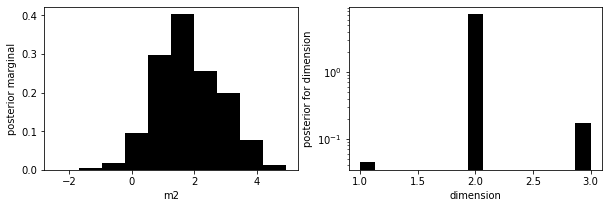

In [27]:
# Plot marginal for selected model parameters.

dimension=2
parameter=1 # Must range between 1 and dimension.
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
idx=np.where(samples[0,:]==dimension)
plt.hist(samples[parameter,idx].flatten(), bins=10, color='k', density=True)
plt.xlabel('m'+str(dimension))
plt.ylabel('posterior marginal')

plt.subplot(1,2,2)
# Plot marginal for dimension.
plt.hist(samples[0,:], bins=15, color='k', density=True)
plt.yscale('log', nonpositive='clip')
plt.xlabel('dimension')
plt.ylabel('posterior for dimension')
plt.show()

## Discrete Optimization

Combinatorial Optimisation deals with finite sets of discrete variables, typically where solutions are constrained. It is closely related to the field of “Operations Research”.

Examples include vehicle routing problems and the optimal allocation of resources.

* Mathematical Optimization
  * OR-Tools intro
  * Constraint Programming
  * Sudoku example
* Linear programming
  * Pete’s Pottery Example
* Vehicle routing problem

### Mathematical Optimization

Mathematical optimization is a framework that lives within the realm of Artitificial Intelligence. The goal is to make automated decisions, and optimization/search techicniques are one way of making decisions.

Mathematical optimization is very efficient for large solution spaces, and it does not require training data. By using contraints you are able to prune the search space, and with Linear Programming you make sure that you found the optimal solution for your problem. Another approach is to use Mixed-Linear Programming to assign discrete values to an assignement problems. 

In [5]:
import sys
!{sys.executable} -m pip install ortools
import numpy as np
import pandas as pd
from datetime import datetime
from ortools.sat.python import cp_model

     -------------------------------------- 42.2/42.2 MB 181.8 kB/s eta 0:00:00
     ------------------------------------ 527.0/527.0 kB 171.3 kB/s eta 0:00:00
     ------------------------------------ 126.5/126.5 kB 114.6 kB/s eta 0:00:00


## OR-Tools intro

We are using OR-Tools (https://developers.google.com/optimization) as a solver for all the examples. Here is an example of variable definition, adding constraints and solving a problem.

In [8]:
def SolveWithTimeLimitSampleSat():
    """Minimal CP-SAT example to showcase calling the solver."""
    # Creates the model.
    model = cp_model.CpModel()
    # Creates the variables.
    num_vals = 3
    x = model.NewIntVar(0, num_vals - 1, 'x')
    y = model.NewIntVar(0, num_vals - 1, 'y')
    z = model.NewIntVar(0, num_vals - 1, 'z')
    # Adds an all-different constraint.
    
    model.Add(x == y)
    model.Add(x == z)
    model.Add(x > y)

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()

    # Sets a time limit of 10 seconds.
    solver.parameters.max_time_in_seconds = 10.0

    status = solver.Solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        print('x = %i' % solver.Value(x))
        print('y = %i' % solver.Value(y))
        print('z = %i' % solver.Value(z))
    else:
        print("There is no feasible solution")


SolveWithTimeLimitSampleSat()
# [END program]

There is no feasible solution


## Constraint Programming

**Constraint Programming (CP)** is a paradigm for solving combinatorial problems that draws on a wide range of techniques from artificial intelligence, computer science, and operations research. In Constraint Programming, users declaratively state the constraints on the feasible solutions for a set of decision variables. Constraints differ from the common primitives of imperative programming languages in that they do not specify a step or sequence of steps to execute, but rather the properties of a solution to be found. In additions to constraints, users also need to specify a method to solve these constraints. This typically draws upon standard methods like chronological backtracking and constraint propagation, but may use customized code like a problem specific branching heuristic.

Constraint Programming is based on feasibility (finding a feasible solution) rather than optimization (finding an optimal solution) and focuses on the constraints and variables rather than the objective function. In fact, a CP problem may not even have an objective function — the goal may simply be to narrow down a vary large set of possible solutions to a more manageable subset by adding constraints to the problem. However, CP can be used to solve standard optimization problems, which have an objective function, by simply comparing the value of the objective for all feasible solutions. See The Job shop problem for an example of this.

## Sudoku example

Sudoku is a mathematical game that was invented in the late 1970s, became popular in Japan in the 1980s and became known internationally in 2005 when numerous newspapers began publishing it in their hobbies section.

The objective of the game is to place numbers from 1 to 9 in each of the empty cells in a 9x9 grid, consisting of 3x3 subgrades called regions. The puzzle contains some initial clues, which are numbers inserted into some cells, to allow an induction or deduction of numbers into empty cells. Each column, row, and region can only have a number from each of 1 through 9.

To start modeling a Sudoku Solver with OR Tools Constraint Programming, the following steps must be executed:

* To start modeling with OR Tools is to create a model with cp_model.CpModel();
* Create a grid of variables. Every variables represents a cell of the sudoku solver, this means that every variable must be an integer value and vary from 1 to 9. That been said a matrix  𝑥
x
  is created, where known values (of the initial puzzle) are copied to the matrix and the unknown values are initialized as integer variables;
* Define the rows, columns and regions constraints. OR Tools have a Global Constraint (GC) that declare that a set of variables must have different values. To use the GC, the function model.AddAllDifferent must be used;
* * Create a solver using cp_model.CpSolver();
Solve model using solver.Solve(model);
* After model is solved, use solver.Value to show the final value of all variables on the  𝑥 matrix.

In [45]:
sample = ['000000000005080900003040070070960000000020760000801002008294016609108020000007003',
 '867319254245786931913542678472963185381425769596871342738294516659138427124657893']

sample = pd.Series(sample, index =['puzzle', 'solution'])

In [46]:
def decode_sudoku(sample: str) -> np.matrix:
    '''Transform an encoded puzzle into an integer matrix.'''
    return np.matrix([np.array(list(sample[i:i+9])).astype(int) for i in range(0, len(sample), 9)])

decoded_puzzle = decode_sudoku(sample['puzzle'])
decoded_puzzle

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 5, 0, 8, 0, 9, 0, 0],
        [0, 0, 3, 0, 4, 0, 0, 7, 0],
        [0, 7, 0, 9, 6, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 7, 6, 0],
        [0, 0, 0, 8, 0, 1, 0, 0, 2],
        [0, 0, 8, 2, 9, 4, 0, 1, 6],
        [6, 0, 9, 1, 0, 8, 0, 2, 0],
        [0, 0, 0, 0, 0, 7, 0, 0, 3]])

In [47]:
def encode_sudoku(sudoku: np.matrix) -> str:
    '''Transform an integer matrix into an encoded string'''
    return ''.join([''.join(list(r.astype(str))) for r in np.asarray(sudoku)])

encoded_puzzle = encode_sudoku(decoded_puzzle)

In [48]:
def solve_with_cp(grid: np.matrix) -> (np.matrix, float):
    '''Solve Sudoku instance (np.matrix) with CP modeling. Returns a tuple with the resulting matrix and the execution time in seconds.'''
    assert grid.shape == (9,9)

    grid_size = 9
    region_size = 3 #np.sqrt(grid_size).astype(np.int)
    model = cp_model.CpModel() # Step 1

    # Begin of Step2: Create and initialize variables.
    x = {}
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] != 0:
                x[i, j] = grid[i, j] # Initial values (values already defined on the puzzle).
            else:
                x[i, j] = model.NewIntVar(1, grid_size, 'x[{},{}]'.format(i,j) ) # Values to be found (variyng from 1 to 9).
    # End of Step 2.

    # Begin of Step3: Values constraints.
    # AllDifferent on rows, to declare that all elements of all rows must be different.
    for i in range(grid_size):
        model.AddAllDifferent([x[i, j] for j in range(grid_size)])

    # AllDifferent on columns, to declare that all elements of all columns must be different.
    for j in range(grid_size):
        model.AddAllDifferent([x[i, j] for i in range(grid_size)])

    # AllDifferent on regions, to declare that all elements of all regions must be different.
    for row_idx in range(0, grid_size, region_size):
        for col_idx in range(0, grid_size, region_size):
            model.AddAllDifferent([x[row_idx + i, j] for j in range(col_idx, (col_idx + region_size)) for i in range(region_size)])
    # End of Step 3.

    solver = cp_model.CpSolver() # Step 4
    start = datetime.now()
    status = solver.Solve(model) # Step 5
    exec_time = datetime.now() - start
    result = np.zeros((grid_size, grid_size)).astype(int)

    # Begin of Step 6: Getting values defined by the solver
    if status == cp_model.FEASIBLE or cp_model.OPTIMAL:
        for i in range(grid_size):
            for j in range(grid_size):
                result[i,j] = int(solver.Value(x[i,j]))
        print(result)
    else:
        raise Exception('Unfeasible Sudoku')
    # End of Step 6

solve_with_cp(decoded_puzzle)

[[8 9 7 3 1 6 2 4 5]
 [4 6 5 7 8 2 9 3 1]
 [1 2 3 5 4 9 6 7 8]
 [5 7 2 9 6 3 1 8 4]
 [3 8 1 4 2 5 7 6 9]
 [9 4 6 8 7 1 3 5 2]
 [7 3 8 2 9 4 5 1 6]
 [6 5 9 1 3 8 4 2 7]
 [2 1 4 6 5 7 8 9 3]]


##References
* https://www.kaggle.com/danielmartinezb/irregular-6x6-sudoku-a-search
* https://en.wikipedia.org/wiki/Constraint_programming
* https://pt.wikipedia.org/wiki/Sudoku
* https://developers.google.com/optimization
* https://towardsdatascience.com/using-integer-linear-programming-to-solve-sudoku-puzzles-15e9d2a70baa
* https://en.wikipedia.org/wiki/Linear_programming
* https://en.wikipedia.org/wiki/Integer_programming
* https://en.wikipedia.org/wiki/Vehicle_routing_problem

### Linear Programming

**Linear programming (LP)**, also called linear optimization, is a method to achieve the best outcome (such as maximum profit or lowest cost) in a mathematical model whose requirements are represented by linear relationships. Linear programming is a special case of mathematical programming (also known as mathematical optimization).

More formally, linear programming is a technique for the optimization of a linear objective function, subject to linear equality and linear inequality constraints. Its feasible region is a convex polytope, which is a set defined as the intersection of finitely many half spaces, each of which is defined by a linear inequality. Its objective function is a real-valued affine (linear) function defined on this polyhedron. A linear programming algorithm finds a point in the polytope where this function has the smallest (or largest) value if such a point exists.

In [7]:
import sys
# !{sys.executable} -m pip install ortools
import numpy as np
import pandas as pd
from datetime import datetime
from ortools.sat.python import cp_model
from ortools.linear_solver import pywraplp
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

## Pete's Pottery Example

Pete's online pottery shop only sells two products: small and large vases. Each product takes a specific amount of clay and glaze to build, and they are sold at different prices. The amount of available is is limited, and Pete must decide what is the best use he can from the available materials to maximize his profits. 

### Products

* Small Vase
  * 1.5 oz. clay, 0.75 oz. glaze
  * sells for $3.00 each

* Large Vase
  * 3.5 oz. clay, 2.5 oz. glaze
  * sells for $9.00 each

Inventory
* Clay - 240 oz
* Glaze - 160 oz



In [51]:
# Create the linear solver with the GLOP backend. - Google Linear Optimization Package
solver = pywraplp.Solver.CreateSolver('GLOP')

infinity = solver.infinity()
# Create the variables x and y.
sVase = solver.NumVar(0.0, infinity, 'sVase')
lVase = solver.NumVar(0.0, infinity, 'lVase')

print('Number of variables =', solver.NumVariables())

solver.Add(1.5 * sVase  + 3.5 * lVase <=240) #Clay
solver.Add(0.75 * sVase  + 2.5 * lVase <=160) #Glaze

print('Number of constraints =', solver.NumConstraints())

solver.Maximize(3 * sVase + 9 * lVase) #

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('sVase =', int(sVase.solution_value()))
    print('lVase =', int(lVase.solution_value()))
else:
    print('The problem does not have an optimal solution.')

print('\nAdvanced usage:')
print('Problem solved in %f milliseconds' % solver.wall_time())
print('Problem solved in %d iterations' % solver.iterations())
print('Problem solved in %d branch-and-bound nodes' % solver.nodes())

Number of variables = 2
Number of constraints = 2
Solution:
sVase = 35
lVase = 53

Advanced usage:
Problem solved in 4.000000 milliseconds
Problem solved in 2 iterations
Problem solved in -1 branch-and-bound nodes


**Exercise #1.** What if Pete decided to also produce huge vases and, ashtrays? what is the optimal decision now?

* Ashtray
  * 1 oz. clay, 2 oz. glaze
  * sells for $4.00 each

In [54]:
# Create the linear solver with the GLOP backend. - Google Linear Optimization Package
solver = pywraplp.Solver.CreateSolver('GLOP')

infinity = solver.infinity()
# Create the variables x and y.
sVase = solver.NumVar(0.0, infinity, 'sVase')
lVase = solver.NumVar(0.0, infinity, 'lVase')
ashtray = solver.NumVar(0.0, infinity, 'ashtray')


print('Number of variables =', solver.NumVariables())

solver.Add(1.5 * sVase  + 3.5 * lVase + ashtray * 1 <=240) #Clay
solver.Add(0.75 * sVase  + 2.5 * lVase + ashtray * 2 <=160) #Glaze

print('Number of constraints =', solver.NumConstraints())

solver.Maximize(3 * sVase + 9 * lVase + 8 * ashtray) #
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('sVase =', int(sVase.solution_value()))
    print('lVase =', int(lVase.solution_value()))
    print('ashtray =', int(ashtray.solution_value()))
else:
    print('The problem does not have an optimal solution.')

print('\nAdvanced usage:')
print('Problem solved in %f milliseconds' % solver.wall_time())
print('Problem solved in %d iterations' % solver.iterations())
print('Problem solved in %d branch-and-bound nodes' % solver.nodes())

Number of variables = 3
Number of constraints = 2
Solution:
sVase = 0
lVase = 0
ashtray = 80

Advanced usage:
Problem solved in 7.000000 milliseconds
Problem solved in 1 iterations
Problem solved in -1 branch-and-bound nodes


In [12]:
# Create the linear solver with the GLOP backend.
solver = pywraplp.Solver.CreateSolver('GLOP')

infinity = solver.infinity()
# Create the variables x and y.
sVase = solver.NumVar(0.0, infinity, 'sVase')
lVase = solver.NumVar(0.0, infinity, 'lVase')
ashtray = solver.NumVar(0.0, infinity, 'ashtray')

print('Number of variables =', solver.NumVariables())

solver.Add(1.5 * sVase  + 3.5 * lVase + 1 * ashtray<=240) #Clay
solver.Add(0.75 * sVase  + 2.5 * lVase +  2 * ashtray <=160) #Glaze

print('Number of constraints =', solver.NumConstraints())

solver.Maximize(3 * sVase + 9 * lVase + 4 * ashtray) #

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('sVase =', int(sVase.solution_value()))
    print('lVase =', int(lVase.solution_value()))
    print('ashtray =', int(ashtray.solution_value()))
    
else:
    print('The problem does not have an optimal solution.')

print('\nAdvanced usage:')
print('Problem solved in %f milliseconds' % solver.wall_time())
print('Problem solved in %d iterations' % solver.iterations())
print('Problem solved in %d branch-and-bound nodes' % solver.nodes())

Number of variables = 3
Number of constraints = 2
Solution:
sVase = 35
lVase = 53
ashtray = 0

Advanced usage:
Problem solved in 7.000000 milliseconds
Problem solved in 2 iterations
Problem solved in -1 branch-and-bound nodes


**Exercise #2**. Pete found a box with dye (100 units) , so he can now add color to the products. What is the optimal production decision?

* Large Vase: 4 dye
* Small Vase: 2 dye
* Ashtray: 1 dye

**Give-away Exercise**

A company that produces two products (A and B) wants to determine the production levels of each product that will maximize profit. 

The problem can be formulated as follows:

Maximize:
z = 3x1 + 5x2 (objective function)

Subject to:
- 2x1 + x2 <= 12 (constraint 1: available hours)
- x1 + x2 <= 8 (constraint 2: available materials)
- x1 >= 0, x2 >= 0 (non-negativity constraints)

Where x1 and x2 are the number of units of product A and B produced, respectively.

### Vehicle routing problem

The **vehicle routing problem (VRP)** is a combinatorial optimization and integer programming problem which asks "What is the optimal set of routes for a fleet of vehicles to traverse in order to deliver to a given set of customers?". It generalises the well-known travelling salesman problem (TSP). It first appeared in a paper by George Dantzig and John Ramser in 1959, in which the first algorithmic approach was written and was applied to petrol deliveries. Often, the context is that of delivering goods located at a central depot to customers who have placed orders for such goods. The objective of the VRP is to minimize the total route cost. In 1964, Clarke and Wright improved on Dantzig and Ramser's approach using an effective greedy approach called the savings algorithm.

Determining the optimal solution to VRP is NP-hard, so the size of problems that can be solved, optimally, using mathematical programming or combinatorial optimization may be limited. Therefore, commercial solvers tend to use heuristics due to the size and frequency of real world VRPs they need to solve.

Note: The VRP has many direct applications in industry. In fact, the use of computer optimization programs can give savings of 5% to a company as transportation is usually a significant component of the cost of a product (10%) - indeed, the transportation sector makes up 10% of the EU's GDP. Consequently, any savings created by the VRP, even less than 5%, are significant.

**Example**
Imagine a company that needs to visit its customers in a city made up of identical rectangular blocks. A diagram of the city is shown below, with the company location marked in black and the locations to visit in blue.



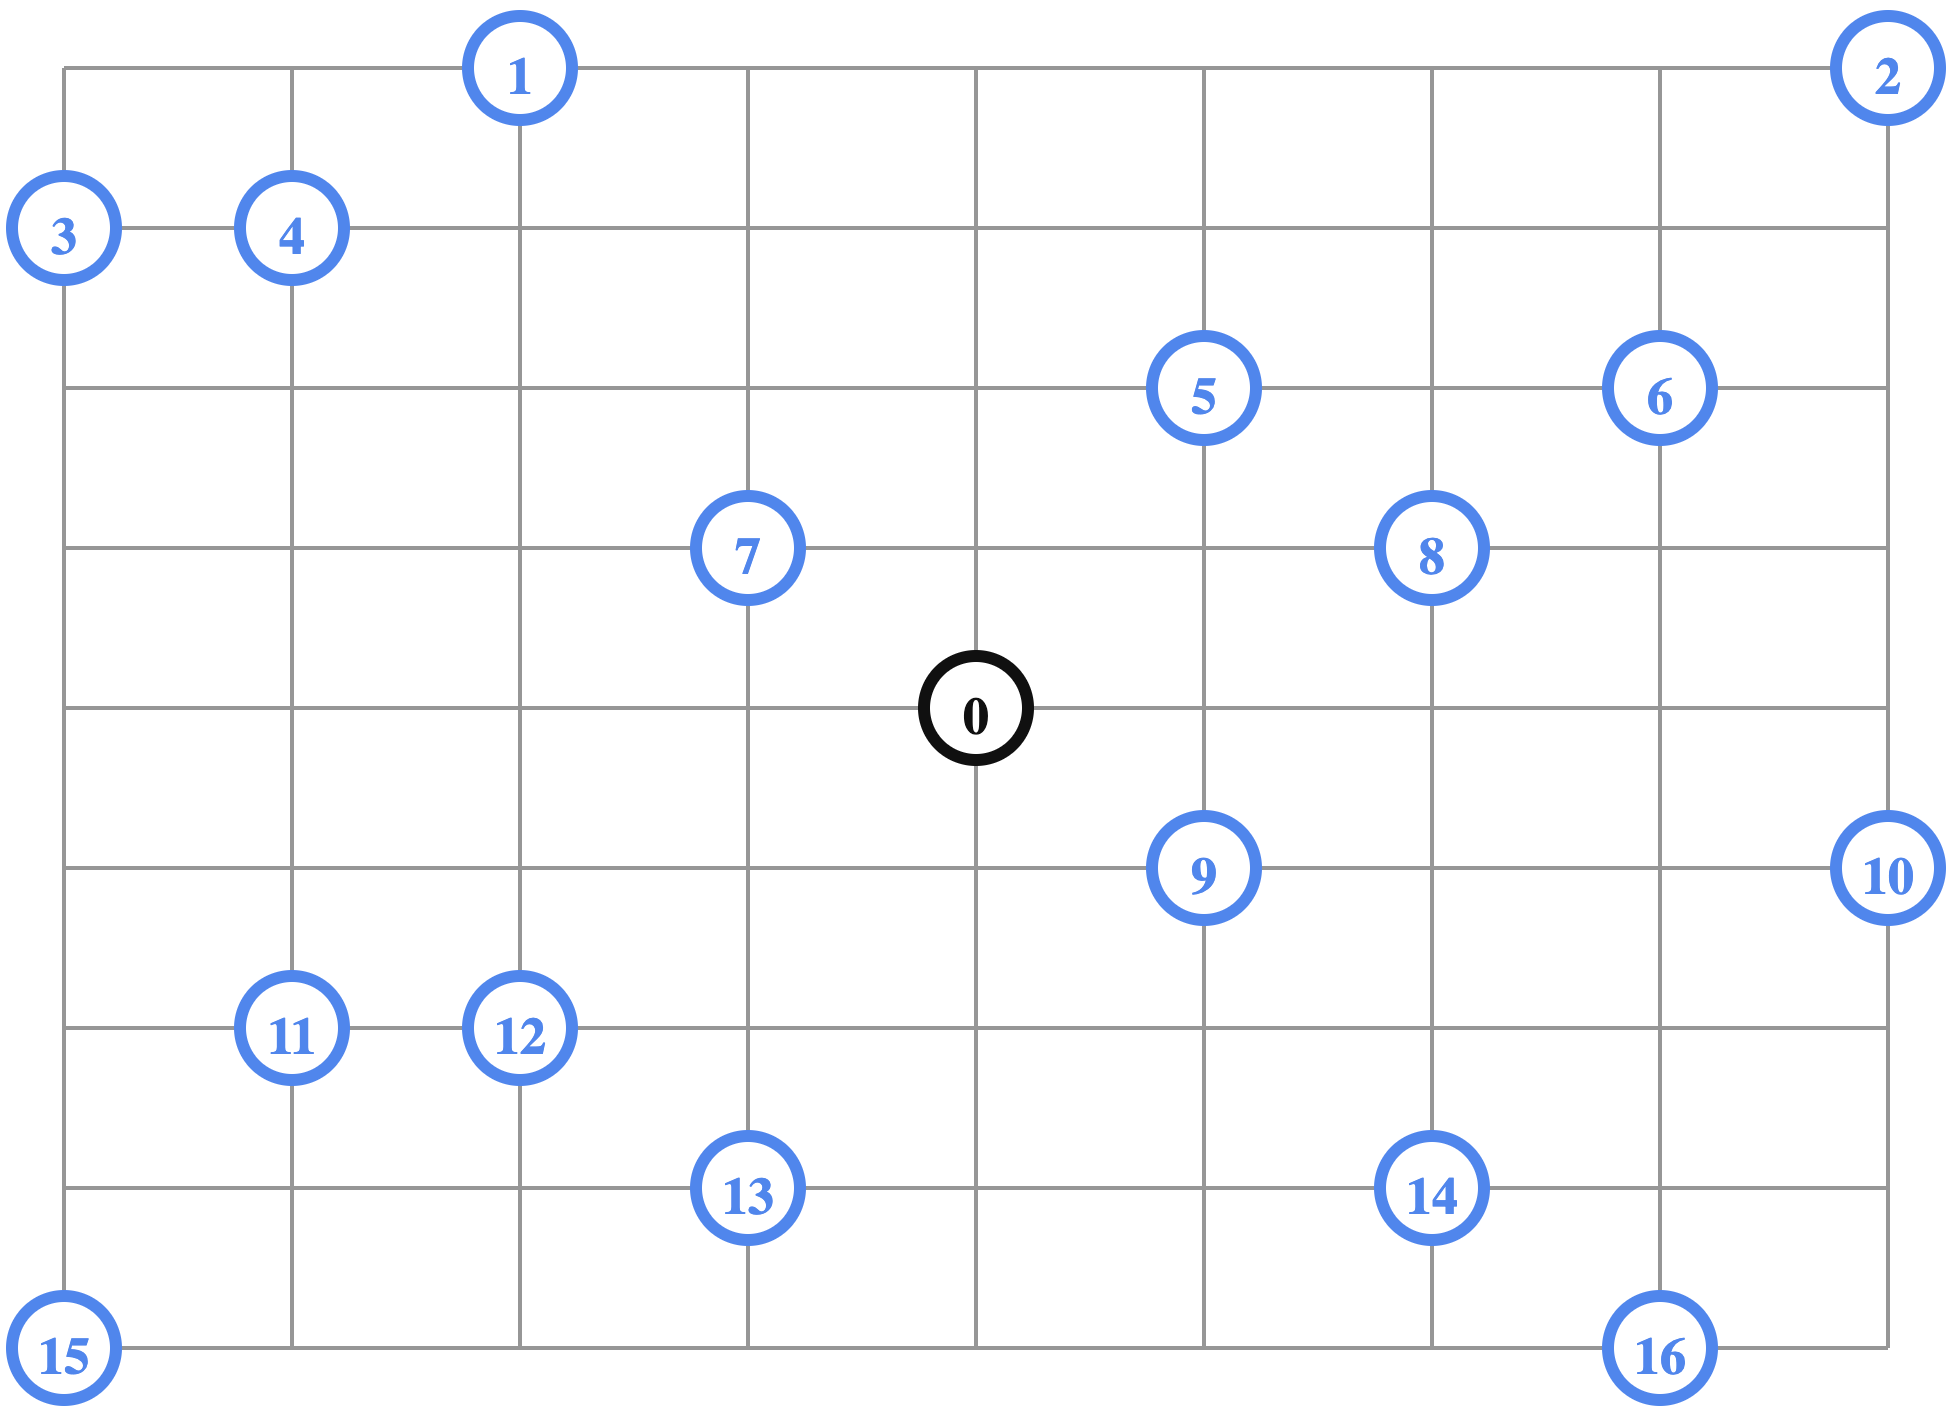

In [3]:
import sys
!{sys.executable} -m pip install ortools tqdm
import numpy as np
import pandas as pd
from datetime import datetime
from ortools.sat.python import cp_model
from ortools.linear_solver import pywraplp
from tqdm.notebook import tqdm
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)


In [4]:
def create_data_model():
    """
    Stores the data for the problem.
    The data consists of:

    distance_matrix: An array of distances between locations on meters.
    num_locations: The number of locations.
    num_vehicles: The number of vehicles in the fleet.
    depot: The index of the depot, the location where all vehicles start 
    and end their routes.
    """

    data = {}
    data['distance_matrix'] = [
        [
            0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354,
            468, 776, 662
        ],
        [
            548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674,
            1016, 868, 1210
        ],
        [
            776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164,
            1130, 788, 1552, 754
        ],
        [
            696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822,
            1164, 560, 1358
        ],
        [
            582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708,
            1050, 674, 1244
        ],
        [
            274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628,
            514, 1050, 708
        ],
        [
            502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856,
            514, 1278, 480
        ],
        [
            194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320,
            662, 742, 856
        ],
        [
            308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662,
            320, 1084, 514
        ],
        [
            194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388,
            274, 810, 468
        ],
        [
            536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764,
            730, 388, 1152, 354
        ],
        [
            502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114,
            308, 650, 274, 844
        ],
        [
            388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194,
            536, 388, 730
        ],
        [
            354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0,
            342, 422, 536
        ],
        [
            468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536,
            342, 0, 764, 194
        ],
        [
            776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274,
            388, 422, 764, 0, 798
        ],
        [
            662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730,
            536, 194, 798, 0
        ],
    ]
    data['num_vehicles'] = 4
    data['depot'] = 0

    # To be used in case capacities are required
    data['demands'] = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8]
    data['vehicle_capacities'] = [15, 15, 15, 15]

    data['pickups_deliveries'] = [
        [1, 6],
        [2, 10],
        [4, 3],
        [5, 9],
        [7, 8],
        [15, 11],
        [13, 12],
        [16, 14],
    ]

    return data


def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))



def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
    else:
        print('No solution found !')

main()

Objective: 177500
Route for vehicle 0:
 0 ->  9 ->  10 ->  2 ->  6 ->  5 -> 0
Distance of the route: 1712m

Route for vehicle 1:
 0 ->  16 ->  14 ->  8 -> 0
Distance of the route: 1484m

Route for vehicle 2:
 0 ->  7 ->  1 ->  4 ->  3 -> 0
Distance of the route: 1552m

Route for vehicle 3:
 0 ->  13 ->  15 ->  11 ->  12 -> 0
Distance of the route: 1552m

Maximum of the route distances: 1712m


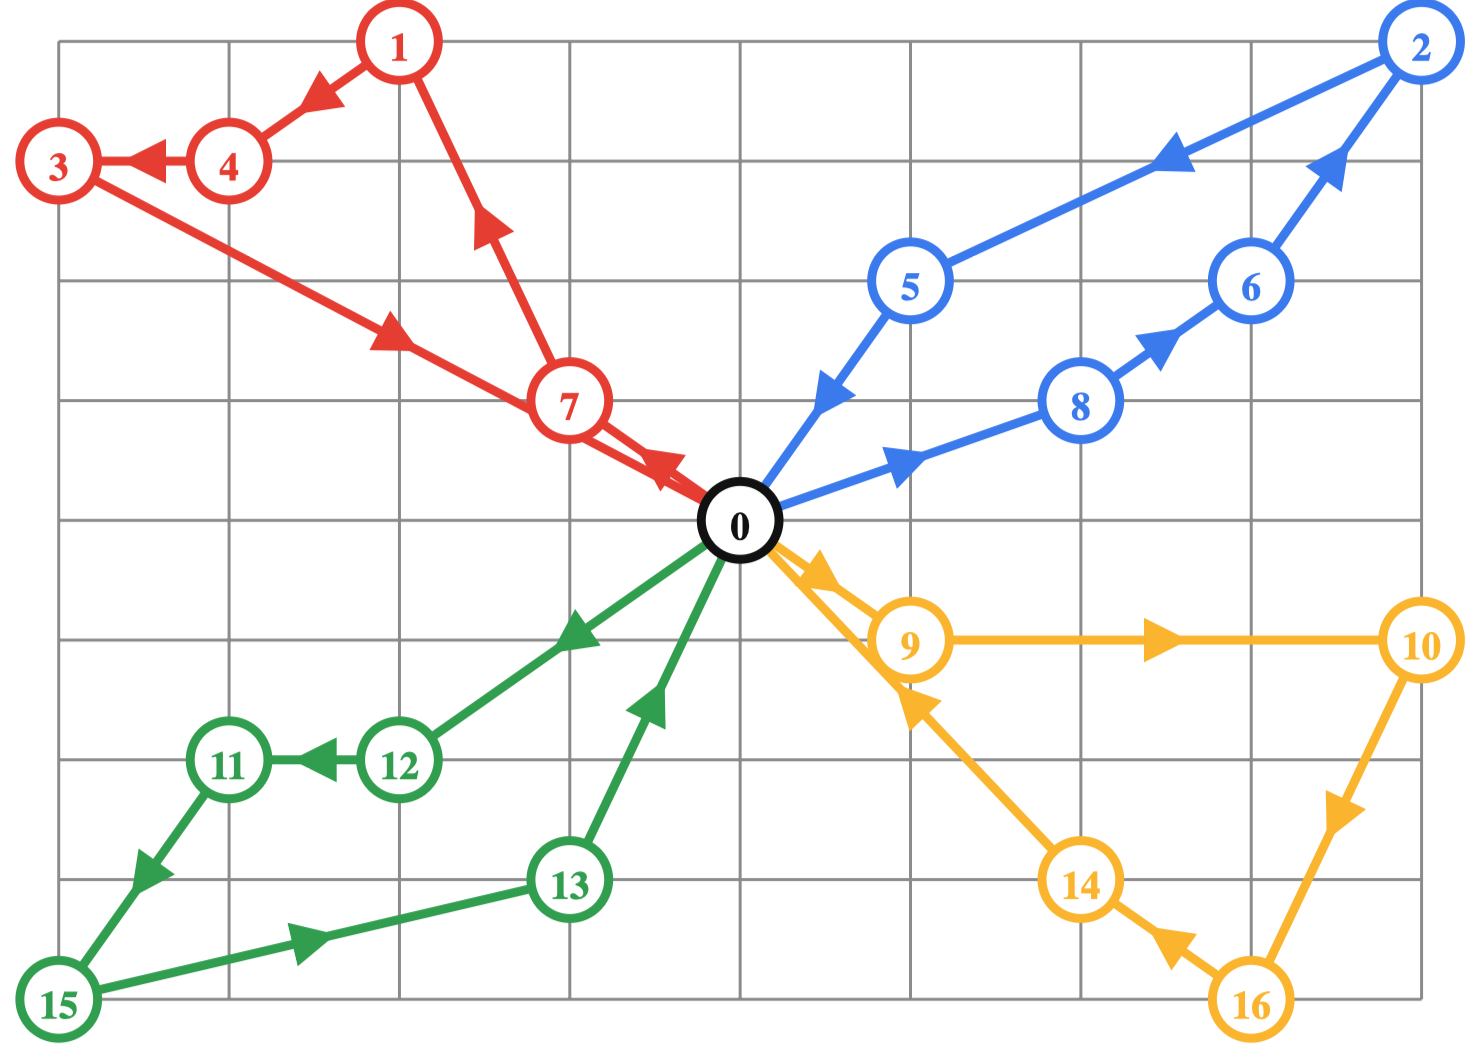

A variation of the problem is the **capacitated vehicle routing problem (CVRP)** in which vehicles with limited carrying capacity need to pick up or deliver items at various locations. The items have a quantity, such as weight or volume, and the vehicles have a maximum capacity that they can carry. The problem is to pick up or deliver the items for the least cost, while never exceeding the capacity of the vehicles.

In [5]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data['demands'][node_index]
            plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),
                                                 route_load)
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        plan_output += 'Load of the route: {}\n'.format(route_load)
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print('Total distance of all routes: {}m'.format(total_distance))
    print('Total load of all routes: {}'.format(total_load))


"""Solve the CVRP problem."""
# Instantiate the data problem.
data = create_data_model()

# Create the routing index manager.

manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])


# Create Routing Model.

routing = pywrapcp.RoutingModel(manager)


# Create and register a transit callback.
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)


# Add Capacity constraint.
def demand_callback(from_index):
    """Returns the demand of the node."""
    # Convert from routing variable Index to demands NodeIndex.
    from_node = manager.IndexToNode(from_index)
    return data['demands'][from_node]

demand_callback_index = routing.RegisterUnaryTransitCallback(
    demand_callback)
routing.AddDimensionWithVehicleCapacity(
    demand_callback_index,
    0,  # null capacity slack
    data['vehicle_capacities'],  # vehicle maximum capacities
    True,  # start cumul to zero
    'Capacity')

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
search_parameters.time_limit.FromSeconds(1)

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

# Print solution on console.
if solution:
    print_solution(data, manager, routing, solution)

Objective: 6208
Route for vehicle 0:
 0 Load(0) ->  4 Load(4) ->  3 Load(6) ->  1 Load(7) ->  7 Load(15) ->  0 Load(15)
Distance of the route: 1552m
Load of the route: 15

Route for vehicle 1:
 0 Load(0) ->  14 Load(4) ->  16 Load(12) ->  10 Load(14) ->  9 Load(15) ->  0 Load(15)
Distance of the route: 1552m
Load of the route: 15

Route for vehicle 2:
 0 Load(0) ->  12 Load(2) ->  11 Load(3) ->  15 Load(11) ->  13 Load(15) ->  0 Load(15)
Distance of the route: 1552m
Load of the route: 15

Route for vehicle 3:
 0 Load(0) ->  8 Load(8) ->  2 Load(9) ->  6 Load(13) ->  5 Load(15) ->  0 Load(15)
Distance of the route: 1552m
Load of the route: 15

Total distance of all routes: 6208m
Total load of all routes: 60


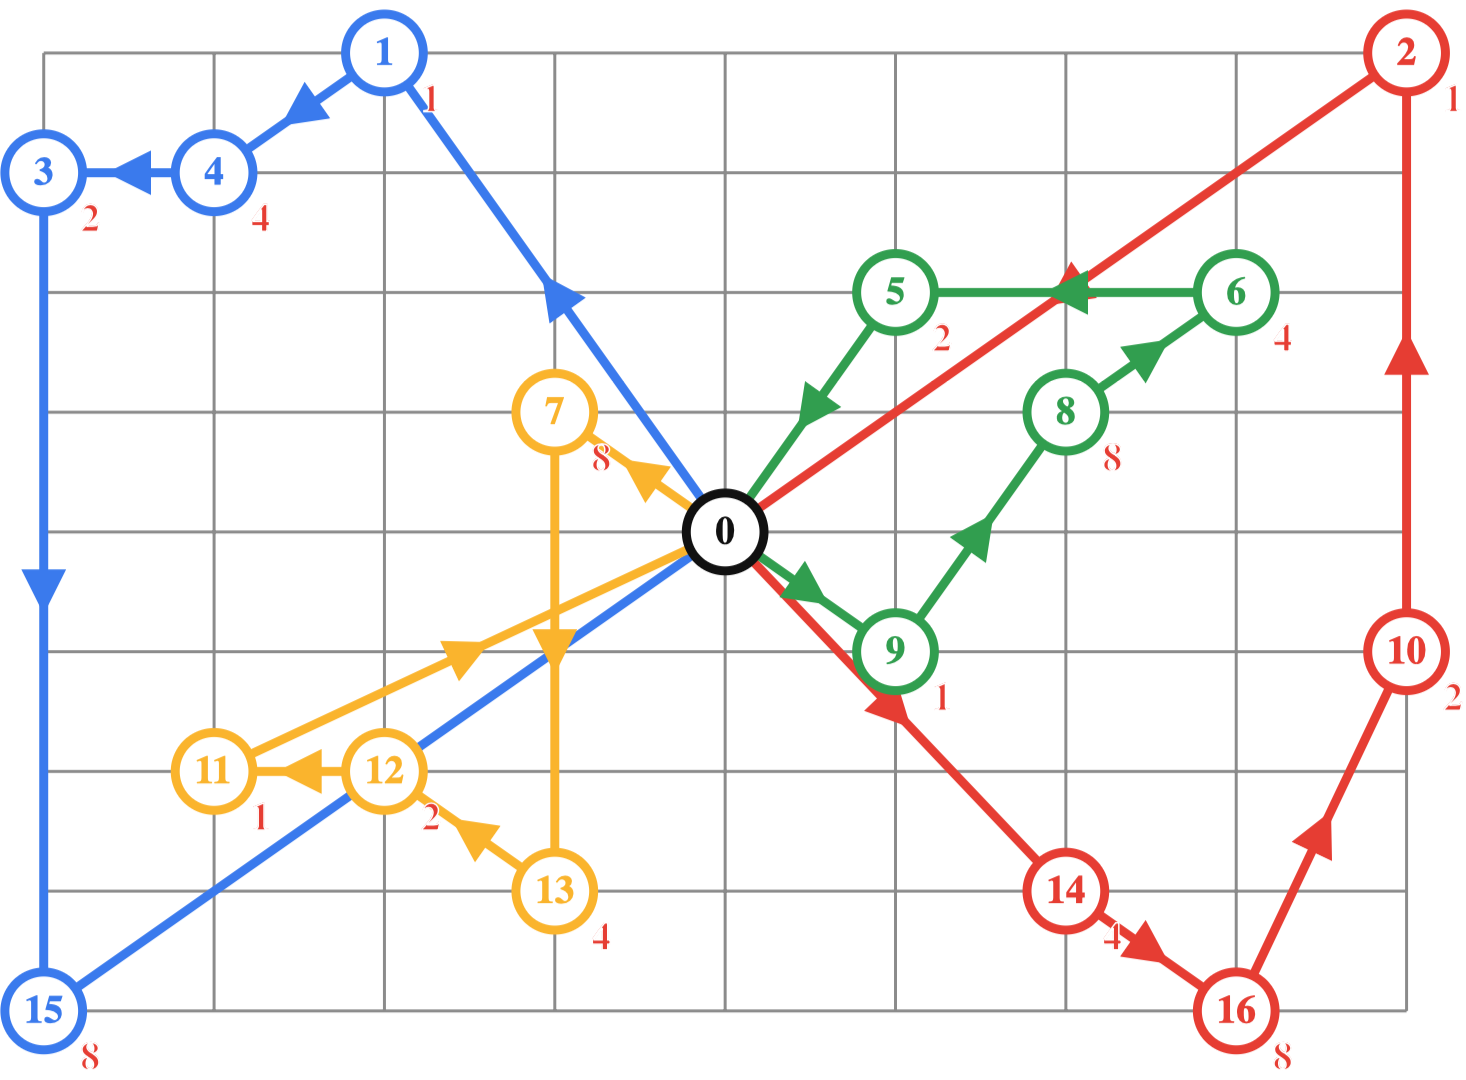

Another variation is a VRP in which each vehicle picks up items at various locations and drops them off at others. The problem is to assign routes for the vehicles to **pick up and deliver** all the items, while minimizing the length of the longest route.

In [6]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    total_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        total_distance += route_distance
    print('Total Distance of all routes: {}m'.format(total_distance))


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Define cost of each arc.
    def distance_callback(from_index, to_index):
        """Returns the manhattan distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Define Transportation Requests.
    for request in data['pickups_deliveries']:
        pickup_index = manager.NodeToIndex(request[0])
        delivery_index = manager.NodeToIndex(request[1])
        routing.AddPickupAndDelivery(pickup_index, delivery_index)
        routing.solver().Add(
            routing.VehicleVar(pickup_index) == routing.VehicleVar(
                delivery_index))
        routing.solver().Add(
            distance_dimension.CumulVar(pickup_index) <=
            distance_dimension.CumulVar(delivery_index))

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PARALLEL_CHEAPEST_INSERTION)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


if __name__ == '__main__':
    main()

Objective: 226116
Route for vehicle 0:
 0 ->  13 ->  15 ->  11 ->  12 -> 0
Distance of the route: 1552m

Route for vehicle 1:
 0 ->  5 ->  2 ->  10 ->  16 ->  14 ->  9 -> 0
Distance of the route: 2192m

Route for vehicle 2:
 0 ->  4 ->  3 -> 0
Distance of the route: 1392m

Route for vehicle 3:
 0 ->  7 ->  1 ->  6 ->  8 -> 0
Distance of the route: 1780m

Total Distance of all routes: 6916m


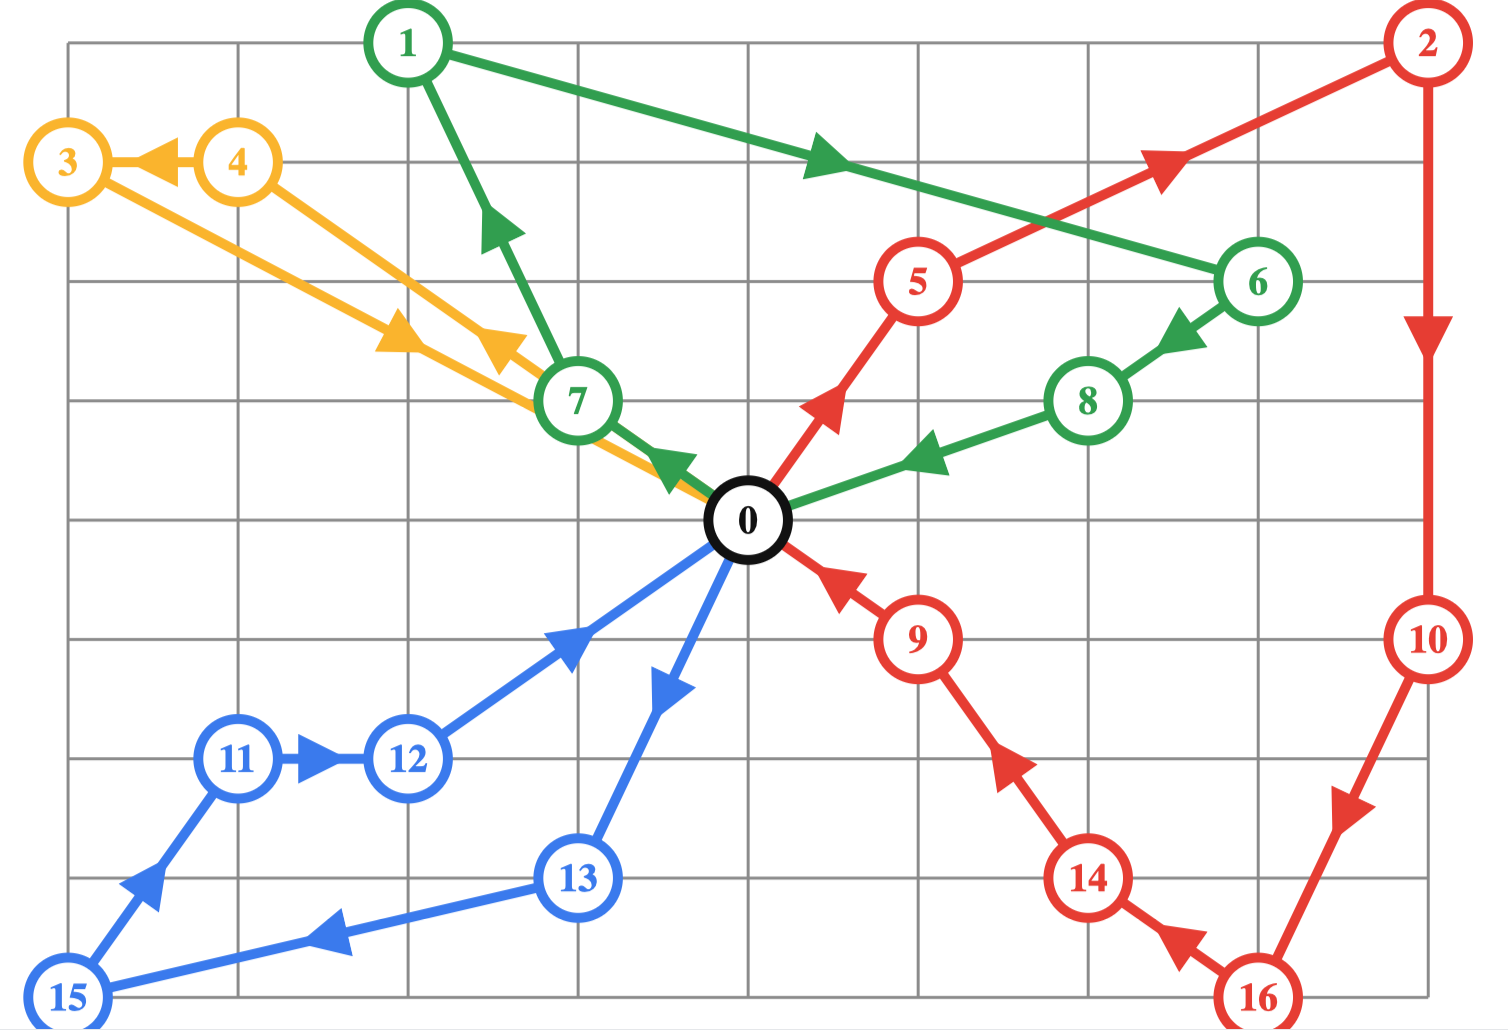

#### References
* https://www.kaggle.com/danielmartinezb/irregular-6x6-sudoku-a-search
* https://en.wikipedia.org/wiki/Constraint_programming
* https://pt.wikipedia.org/wiki/Sudoku
* https://developers.google.com/optimization
* https://towardsdatascience.com/using-integer-linear-programming-to-solve-sudoku-puzzles-15e9d2a70baa
* https://en.wikipedia.org/wiki/Linear_programming
* https://en.wikipedia.org/wiki/Integer_programming
* https://en.wikipedia.org/wiki/Vehicle_routing_problem

In [13]:
# Create the linear solver with the GLOP backend.
solver = pywraplp.Solver.CreateSolver('GLOP')

infinity = solver.infinity()
# Create the variables x and y.
sVase = solver.NumVar(0.0, infinity, 'sVase')
lVase = solver.NumVar(0.0, infinity, 'lVase')
ashtray = solver.NumVar(0.0, infinity, 'ashtray')

print('Number of variables =', solver.NumVariables())

solver.Add(1.5 * sVase  + 3.5 * lVase + 1 * ashtray<=240) #Clay
solver.Add(0.75 * sVase  + 2.5 * lVase +  2 * ashtray <=160) #Glaze
solver.Add(2 * sVase  + 4 * lVase +  1 * ashtray <=100) #Dye


print('Number of constraints =', solver.NumConstraints())

solver.Maximize(3 * sVase + 9 * lVase + 4 * ashtray) #

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('sVase =', int(sVase.solution_value()))
    print('lVase =', int(lVase.solution_value()))
    print('ashtray =', int(ashtray.solution_value()))
    
else:
    print('The problem does not have an optimal solution.')

print('\nAdvanced usage:')
print('Problem solved in %f milliseconds' % solver.wall_time())
print('Problem solved in %d iterations' % solver.iterations())
print('Problem solved in %d branch-and-bound nodes' % solver.nodes())

Number of variables = 3
Number of constraints = 3
Solution:
sVase = 0
lVase = 7
ashtray = 70

Advanced usage:
Problem solved in 6.000000 milliseconds
Problem solved in 2 iterations
Problem solved in -1 branch-and-bound nodes


### Fleet Decarbonization

This is a real case study from a bp project: what is the optimal fleet configuration after a decarbonization selection  over the vehicles of an existing fleet?

Assumptions:

* all vehicles behave the same (have the same driving style, same route, same characteristics)
* the number of vehicles do not change

We want to know: what is the investment required to reach carbon zero?

In [16]:
import sys
# !{sys.executable} -m pip install ortools
import numpy as np
import pandas as pd
from datetime import datetime
from ortools.sat.python import cp_model
from ortools.linear_solver import pywraplp
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [17]:
light_duty = 'LIGHT DUTY'
medium_duty = 'MEDIUM DUTY'
heavy_duty = 'HEAVY DUTY'

#Number of vehicles
number_of_light_vehicles = 500
number_of_medium_vehicles = 600
number_of_heavy_vehicles = 700

#Carbon Emission values per vehicle
carbon_injection_light = 1900
carbon_injection_medium = 2900
carbon_injection_heavy = 3900

carbon_electric_light = 0
carbon_electric_medium = 0
carbon_electric_heavy = 0

carbon_phev_light = 900
carbon_phev_medium = 1000
carbon_phev_heavy = 1100

#Cost per vehicle type
cost_electric_light = 2000
cost_electric_medium = 2300
cost_electric_heavy = 2600

cost_phev_light = 9000
cost_phev_medium = 1200
cost_phev_heavy = 1800


In [18]:
def decarb_model():
    solver = pywraplp.Solver.CreateSolver("GLOP")
    
    #number of vehicles
    n_electric_light = solver.NumVar(0, number_of_light_vehicles, "n_electric_light")
    n_electric_medium = solver.NumVar(0, number_of_medium_vehicles, "n_electric_medium")
    n_electric_heavy = solver.NumVar(0, number_of_heavy_vehicles, "n_electric_heavy")
    
    n_phev_light = solver.NumVar(0, number_of_light_vehicles, "n_phev_light")
    n_phev_medium = solver.NumVar(0, number_of_medium_vehicles, "n_phev_medium")
    n_phev_heavy = solver.NumVar(0, number_of_heavy_vehicles, "n_phev_heavy")
    
    n_injection_light = solver.NumVar(0, number_of_light_vehicles, "n_injection_light")
    n_injection_medium = solver.NumVar(0, number_of_medium_vehicles, "n_injection_medium")
    n_injection_heavy = solver.NumVar(0, number_of_heavy_vehicles, "n_injection_heavy")
    
    n_light = solver.NumVar(0, number_of_light_vehicles, "n_light")
    n_medium = solver.NumVar(0, number_of_medium_vehicles, "n_medium")
    n_heavy = solver.NumVar(0, number_of_heavy_vehicles, "n_heavy")
    
    fleet_total = solver.NumVar(0, solver.infinity(), "fleet_total")
    
    investment = solver.NumVar(0,solver.infinity(),"investment")
    
    # Constraints on the carbon emission
    intial_carbon_emission = float(
        number_of_light_vehicles * carbon_injection_light
        + number_of_medium_vehicles * carbon_injection_medium
        + number_of_heavy_vehicles * carbon_injection_heavy
    )

    carbon_electric = solver.NumVar(0, solver.infinity(), "c_electric")
    carbon_phev = solver.NumVar(0, solver.infinity(), "c_phev")
    carbon_injection = solver.NumVar(0, solver.infinity(), "c_injection")

    carbon_emission = solver.NumVar(0, solver.infinity(), "carbon_emission")

    print("Number of variables =", solver.NumVariables())

    solver.Add(n_light == n_injection_light + n_electric_light + n_phev_light)
    solver.Add(n_medium == n_injection_medium + n_electric_medium + n_phev_medium)
    solver.Add(n_heavy == n_injection_heavy + n_electric_heavy + n_phev_heavy)

    number_of_fleet_vehicles = number_of_light_vehicles + number_of_medium_vehicles + number_of_heavy_vehicles

    solver.Add(fleet_total == number_of_fleet_vehicles)
    solver.Add(fleet_total == n_light + n_medium + n_heavy)

    solver.Add(carbon_emission == carbon_electric + carbon_injection + carbon_phev)

    solver.Add(
        carbon_phev
        == carbon_phev_light * n_phev_light
        + carbon_phev_medium * n_phev_medium
        + carbon_phev_heavy * n_phev_heavy
    )

    solver.Add(
        carbon_electric
        == carbon_electric_light * n_electric_light
        + carbon_electric_medium * n_electric_medium
        + carbon_electric_heavy * n_electric_heavy
    )
    
    solver.Add(
        carbon_injection
        == carbon_injection_light * n_injection_light
        + carbon_injection_medium * n_injection_medium
        + carbon_injection_heavy * n_injection_heavy
    )

    solver.Add(
        investment
        == cost_electric_light * n_electric_light
        + cost_electric_medium * n_electric_medium
        + cost_electric_heavy * n_electric_heavy
        + cost_phev_light * n_phev_light
        + cost_phev_medium * n_phev_medium
        + cost_phev_heavy * n_phev_heavy
    )

    print("Number of constraints =", solver.NumConstraints())

    solver.Minimize(carbon_emission)

    # Solve the system.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solution:")
        print("Initial Carbon Emission:", round(intial_carbon_emission/1000_000,2), "Mtons")
        print(
            "Percentage decrease", round((1 - solver.Objective().Value() / intial_carbon_emission) * 100,2), "% decrease"
        )
        print("Final Carbon Emission =", round(solver.Objective().Value()/1000_000,2), "Mtons")

        print(" ")
        print("n_electric_light =", round(n_electric_light.solution_value(),2))
        print("n_electric_medium =", round(n_electric_medium.solution_value(),2))
        print("n_electric_heavy =", round(n_electric_heavy.solution_value(),2))
        print("n_phev_light =", round(n_phev_light.solution_value(),2))
        print("n_phev_medium =", round(n_phev_medium.solution_value(),2))
        print("n_phev_heavy =", round(n_phev_heavy.solution_value(),2))

        print("n_injection_light =", round(n_injection_light.solution_value(),2))
        print("n_injection_medium =", round(n_injection_medium.solution_value(),2))
        print("n_injection_heavy =", round(n_injection_heavy.solution_value(),2))

    else:
        print("The problem does not have an optimal solution.")

    print("\nAdvanced usage:")
    print("Problem solved in %f milliseconds" % solver.wall_time())
    print("Problem solved in %d iterations" % solver.iterations())

#     print("Investment: ", investment.solution_value())
    
decarb_model()
    
    

Number of variables = 18
Number of constraints = 10
Solution:
Initial Carbon Emission: 5.42 Mtons
Percentage decrease 100.0 % decrease
Final Carbon Emission = 0.0 Mtons
 
n_electric_light = 500.0
n_electric_medium = 600.0
n_electric_heavy = 700.0
n_phev_light = 0.0
n_phev_medium = 0.0
n_phev_heavy = 0.0
n_injection_light = 0.0
n_injection_medium = 0.0
n_injection_heavy = 0.0

Advanced usage:
Problem solved in 2.000000 milliseconds
Problem solved in 0 iterations


## Investment

What if we are limited by a budget? Lets say budget = budget = 1000000, what is the minimum carbon emission and the fleet configuration?

In [ ]:
0:54 minute

## New Vehicle category

Assume that we now have to had a new vehicle category - Passenger vehicles, which can be small [140], medium[200] and large[400].

* Assign appropriate values for cost for the vehicles

* Run the optimization model showing the new fleet and total investment

## Extra

How much is the investment if we want a minimum of x% percentage of decarbonization?

## References

* https://www.kaggle.com/danielmartinezb/irregular-6x6-sudoku-a-search
* https://en.wikipedia.org/wiki/Constraint_programming
* https://pt.wikipedia.org/wiki/Sudoku
* https://developers.google.com/optimization
* https://towardsdatascience.com/using-integer-linear-programming-to-solve-sudoku-puzzles-15e9d2a70baa
* https://en.wikipedia.org/wiki/Linear_programming
* https://en.wikipedia.org/wiki/Integer_programming
* https://en.wikipedia.org/wiki/Vehicle_routing_problem

In [ ]:
### Investment

In [3]:
### Vehicle routing problem